In [69]:
import re
import os
import csv
import matplotlib
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import scipy.stats as ss
from matplotlib import style
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec
pd.options.display.float_format = '{:,.4f}'.format
#pretty display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

matplotlib.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (9, 6)


%config InlineBackend.figure_format = 'retina'
# figure out number of indels

# remake the microbial load data for genome and transcriptome

In [2]:
# f1 = '/projects/trans_scratch/validations/workspace/szong/Cervical/bbt/107_patients/107_patients_RNA_barchart_adjusted_normalized_files.txt'
# f1 = '/projects/trans_scratch/validations/workspace/szong/Cervical/bbt/107_patients/107_patients_DNA_barchart_adjusted_normalized_files.txt'
f1 = '/projects/trans_scratch/validations/workspace/szong/Cervical/bbt/124_patients/124_patients_DNA_barchart_adjusted_normalized_files.txt'
adf = pd.read_csv(f1, header=None, names=['file'])
adf.shape
adf.head(2)

(124, 1)

,file
0,/projects/NCI_validation2_assembly/NCI_SAIC_HI...
1,/projects/NCI_validation2_assembly/NCI_SAIC_HI...


In [3]:
def p2f(x):
    return float(x.strip('%'))/100

In [4]:
def is_non_zero_file(fpath):  
    return True if os.path.isfile(fpath) and os.path.getsize(fpath) > 0 else False

In [5]:
fls = adf.file
dfj = pd.DataFrame()
dfs = dict()
for fl in fls:
    if is_non_zero_file(fl):
        
        dft = pd.read_csv(fl, sep=' ', index_col=[1], header=None, converters={0:p2f})
    #     dft = pd.read_csv(fl, sep=' ', index_col=[1], header=None)
        flds = fl.split('/')
    #     lib = [i for i in flds if re.match('^A[0-9][0-9][0-9][0-9][0-9]', i)][0]
        lib = [i for i in flds if re.match('^HTMCP-[0-9][0-9]-[0-9][0-9]', i)][0]
        dft = dft.rename(columns = {0: lib})

        if dfj.empty:
             dfj = dft
        else:
            dfj = dfj.join(dft, how='outer')
    else:print(fl)

dfj.head(2)
dfj.shape

,HTMCP-03-06-02001,HTMCP-03-06-02002,HTMCP-03-06-02003,HTMCP-03-06-02006,HTMCP-03-06-02007,HTMCP-03-06-02008,HTMCP-03-06-02012,HTMCP-03-06-02013,HTMCP-03-06-02020,HTMCP-03-06-02026,...,HTMCP-03-06-02424,HTMCP-03-06-02427,HTMCP-03-06-02428,HTMCP-03-06-02434,HTMCP-03-06-02435,HTMCP-03-06-02437,HTMCP-03-06-02441,HTMCP-03-06-02442,HTMCP-03-06-02447,HTMCP-03-06-02448
1,,,,,,,,,,,,,,,,,,,,,
Aspergillus_spp,7.524660e-09,7.825120e-09,4.180420e-09,1.262270e-08,3.748410e-09,4.170630e-09,7.099190e-09,0.000000,2.298610e-08,1.142790e-08,...,5.522180e-08,5.954160e-08,4.770850e-08,3.303410e-08,1.099110e-07,9.488190e-08,8.947850e-08,7.669670e-08,3.246940e-08,6.285930e-08
Bacteriodes_spp,NaN,NaN,8.494620e-06,3.269700e-05,8.358950e-07,1.039490e-04,1.064880e-08,0.000216,NaN,7.618590e-09,...,4.733290e-08,1.229250e-07,1.987860e-09,NaN,1.680620e-04,3.062460e-05,1.112380e-06,1.506240e-06,8.726160e-08,NaN


(38, 124)

In [6]:
# normalize to RPM
dfj = dfj.fillna(0)
dfj = dfj * 1000000
dfj.head(2)

,HTMCP-03-06-02001,HTMCP-03-06-02002,HTMCP-03-06-02003,HTMCP-03-06-02006,HTMCP-03-06-02007,HTMCP-03-06-02008,HTMCP-03-06-02012,HTMCP-03-06-02013,HTMCP-03-06-02020,HTMCP-03-06-02026,...,HTMCP-03-06-02424,HTMCP-03-06-02427,HTMCP-03-06-02428,HTMCP-03-06-02434,HTMCP-03-06-02435,HTMCP-03-06-02437,HTMCP-03-06-02441,HTMCP-03-06-02442,HTMCP-03-06-02447,HTMCP-03-06-02448
1,,,,,,,,,,,,,,,,,,,,,
Aspergillus_spp,0.007525,0.007825,0.00418,0.012623,0.003748,0.004171,0.007099,0.000,0.022986,0.011428,...,0.055222,0.059542,0.047709,0.033034,0.109911,0.094882,0.089478,0.076697,0.032469,0.062859
Bacteriodes_spp,0.000000,0.000000,8.49462,32.697000,0.835895,103.949000,0.010649,215.531,0.000000,0.007619,...,0.047333,0.122925,0.001988,0.000000,168.062000,30.624600,1.112380,1.506240,0.087262,0.000000


In [7]:
dfj.shape

(38, 124)

In [19]:
bugs = [ 
 'Human_papillomavirus',
 'Bacteriodes_spp',
 'Streptococcus_spp',
 'Human_herpesvirus_7',
 'Aspergillus_spp',
 'Fusobacterium_nucleatum',
 'Clostridium_spp',
 'Escherichia_coli',
 'Campylobacter_spp',
 'Shigella_spp',
 'Propionibacterium_spp',
 'Human_herpesvirus_4',
 'Human_herpesvirus_6B',
'Klebsiella_spp',
 'Bradyrhizobium_spp',
 'Human_herpesvirus_5',
 'Human_herpesvirus_2']

In [8]:
dfj.index

Index(['Aspergillus_spp', 'Bacteriodes_spp', 'Bradyrhizobium_spp',
       'Burkholderia_spp', 'Campylobacter_spp', 'Candida_albican',
       'Clostridium_spp', 'Cryptococcus_spp', 'Entamoeba_histolytica',
       'Escherichia_coli', 'Fusobacterium_nucleatum',
       'Gordonia_polyisoprenivorans', 'Helicobacter_pylori',
       'Human_adenoviruses', 'Human_herpesvirus_2', 'Human_herpesvirus_4',
       'Human_herpesvirus_5', 'Human_herpesvirus_6A', 'Human_herpesvirus_6B',
       'Human_herpesvirus_7', 'Human_herpesvirus_8', 'Human_papillomavirus',
       'Klebsiella_spp', 'Listeria_spp', 'Mycobacterium_spp', 'Polyomaviruses',
       'Propionibacterium_spp', 'Pseudomonas_spp', 'Ralstonia_spp',
       'Saccharomyces_cerevisiae', 'Shigella_spp', 'Sphingomonas_spp',
       'Staphylococcus_spp', 'Streptococcus_spp', 'other_bacteria',
       'other_viruses', 'phiX', 'vectors'],
      dtype='object', name=1)

In [14]:
df1 = dfj.copy().T

In [15]:
# df2 = df1.T[bugs]
df1.shape

(124, 38)

In [16]:
df1.head(2)

1,Aspergillus_spp,Bacteriodes_spp,Bradyrhizobium_spp,Burkholderia_spp,Campylobacter_spp,Candida_albican,Clostridium_spp,Cryptococcus_spp,Entamoeba_histolytica,Escherichia_coli,...,Ralstonia_spp,Saccharomyces_cerevisiae,Shigella_spp,Sphingomonas_spp,Staphylococcus_spp,Streptococcus_spp,other_bacteria,other_viruses,phiX,vectors
HTMCP-03-06-02001,0.007525,0.0,0.0,0.0,0.0,0.003762,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.037623,0.011287,0.0,0.0
HTMCP-03-06-02002,0.007825,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.007825,0.003913,0.0,0.0


In [18]:
df1['total'] = df1.sum(axis=1)
df1.head(2)

1,Aspergillus_spp,Bacteriodes_spp,Bradyrhizobium_spp,Burkholderia_spp,Campylobacter_spp,Candida_albican,Clostridium_spp,Cryptococcus_spp,Entamoeba_histolytica,Escherichia_coli,...,Saccharomyces_cerevisiae,Shigella_spp,Sphingomonas_spp,Staphylococcus_spp,Streptococcus_spp,other_bacteria,other_viruses,phiX,vectors,total
HTMCP-03-06-02001,0.007525,0.0,0.0,0.0,0.0,0.003762,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.037623,0.011287,0.0,0.0,3.322137
HTMCP-03-06-02002,0.007825,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.007825,0.003913,0.0,0.0,0.058688


In [19]:
df1.shape

(124, 39)

In [20]:
# add in hiv status and histology
# get meta track for example histology
f3 ='/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients/mutation_load_clinic.txt'
df3 = pd.read_csv(f3, sep='\t')
df3 = df3[['patient', 'reanne_HIV_status', 'reanne_Putative_histology']]
df3 = df3.set_index('patient')#.stack().reset_index()
df3.head(2)

,reanne_HIV_status,reanne_Putative_histology
patient,,
HTMCP-03-06-02001,Positive,Squamous
HTMCP-03-06-02002,Negative,Squamous


In [110]:
df2 = df1
dfm = pd.merge(df2, df3, left_index=True, right_index=True)
dfm.head(2)

,Aspergillus_spp,Bacteriodes_spp,Bradyrhizobium_spp,Burkholderia_spp,Campylobacter_spp,Candida_albican,Clostridium_spp,Cryptococcus_spp,Entamoeba_histolytica,Escherichia_coli,...,Sphingomonas_spp,Staphylococcus_spp,Streptococcus_spp,other_bacteria,other_viruses,phiX,vectors,total,reanne_HIV_status,reanne_Putative_histology
HTMCP-03-06-02001,0.0075,0.0000,0.0000,0.0000,0.0000,0.0038,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0376,0.0113,0.0000,0.0000,3.3221,Positive,Squamous
HTMCP-03-06-02002,0.0078,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0078,0.0039,0.0000,0.0000,0.0587,Negative,Squamous


In [35]:
assert ('total' in dfm.columns.tolist()) == True

In [72]:
dfm = dfm.round(4)

In [73]:
dfm.head()

,Aspergillus_spp,Bacteriodes_spp,Bradyrhizobium_spp,Burkholderia_spp,Campylobacter_spp,Candida_albican,Clostridium_spp,Cryptococcus_spp,Entamoeba_histolytica,Escherichia_coli,...,Sphingomonas_spp,Staphylococcus_spp,Streptococcus_spp,other_bacteria,other_viruses,phiX,vectors,total,reanne_HIV_status,reanne_Putative_histology
HTMCP-03-06-02001,0.0075,0.0000,0.0000,0.0000,0.0000,0.0038,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0376,0.0113,0.0000,0.0000,3.3221,Positive,Squamous
HTMCP-03-06-02002,0.0078,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0078,0.0039,0.0000,0.0000,0.0587,Negative,Squamous
HTMCP-03-06-02003,0.0042,8.4946,0.0000,0.0000,0.0502,0.0000,0.0878,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.3679,28.7404,0.0084,0.0084,0.0000,39.6179,Positive,Squamous
HTMCP-03-06-02006,0.0126,32.6970,0.0000,0.0000,0.0000,0.0000,0.0210,0.0000,0.0042,0.0000,...,0.0000,0.0000,0.1304,5.1332,0.0042,0.0000,0.0252,38.0574,Negative,Squamous
HTMCP-03-06-02007,0.0037,0.8359,0.0000,0.0000,0.0187,0.0037,0.0262,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0337,3.6172,0.0000,0.0000,0.0000,4.7005,Negative,Adeno


In [74]:
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/bbt/124_patients/124_microbial_load.txt'
dfm.to_csv(of)

# calculate number of patients with microbes detected

In [86]:
dfm.head(2)

,Aspergillus_spp,Bacteriodes_spp,Bradyrhizobium_spp,Burkholderia_spp,Campylobacter_spp,Candida_albican,Clostridium_spp,Cryptococcus_spp,Entamoeba_histolytica,Escherichia_coli,...,Sphingomonas_spp,Staphylococcus_spp,Streptococcus_spp,other_bacteria,other_viruses,phiX,vectors,total,reanne_HIV_status,reanne_Putative_histology
HTMCP-03-06-02001,0.0075,0.0000,0.0000,0.0000,0.0000,0.0038,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0376,0.0113,0.0000,0.0000,3.3221,Positive,Squamous
HTMCP-03-06-02002,0.0078,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0078,0.0039,0.0000,0.0000,0.0587,Negative,Squamous


In [87]:
dfm.columns

Index(['Aspergillus_spp', 'Bacteriodes_spp', 'Bradyrhizobium_spp',
       'Burkholderia_spp', 'Campylobacter_spp', 'Candida_albican',
       'Clostridium_spp', 'Cryptococcus_spp', 'Entamoeba_histolytica',
       'Escherichia_coli', 'Fusobacterium_nucleatum',
       'Gordonia_polyisoprenivorans', 'Helicobacter_pylori',
       'Human_adenoviruses', 'Human_herpesvirus_2', 'Human_herpesvirus_4',
       'Human_herpesvirus_5', 'Human_herpesvirus_6A', 'Human_herpesvirus_6B',
       'Human_herpesvirus_7', 'Human_herpesvirus_8', 'Human_papillomavirus',
       'Klebsiella_spp', 'Listeria_spp', 'Mycobacterium_spp', 'Polyomaviruses',
       'Propionibacterium_spp', 'Pseudomonas_spp', 'Ralstonia_spp',
       'Saccharomyces_cerevisiae', 'Shigella_spp', 'Sphingomonas_spp',
       'Staphylococcus_spp', 'Streptococcus_spp', 'other_bacteria',
       'other_viruses', 'phiX', 'vectors', 'total', 'reanne_HIV_status',
       'reanne_Putative_histology'],
      dtype='object')

In [89]:
dfm.drop(['phiX', 'vectors', 'total', 'reanne_HIV_status',
       'reanne_Putative_histology'], inplace=True, axis=1)

In [107]:
dfn = (dfm >0.01).sum().sort_values(ascending=False)
odf = dfn[dfn >0].to_frame().reset_index()
odf.columns = ['microbes', 'occurrence']
odf.head(10)

,microbes,occurrence
0,other_bacteria,122
1,Human_herpesvirus_7,100
2,Human_papillomavirus,96
3,other_viruses,79
4,Streptococcus_spp,75
5,Bacteriodes_spp,70
6,Human_herpesvirus_6A,70
7,Escherichia_coli,66
8,Aspergillus_spp,64
9,Human_herpesvirus_6B,48


/home/szong/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


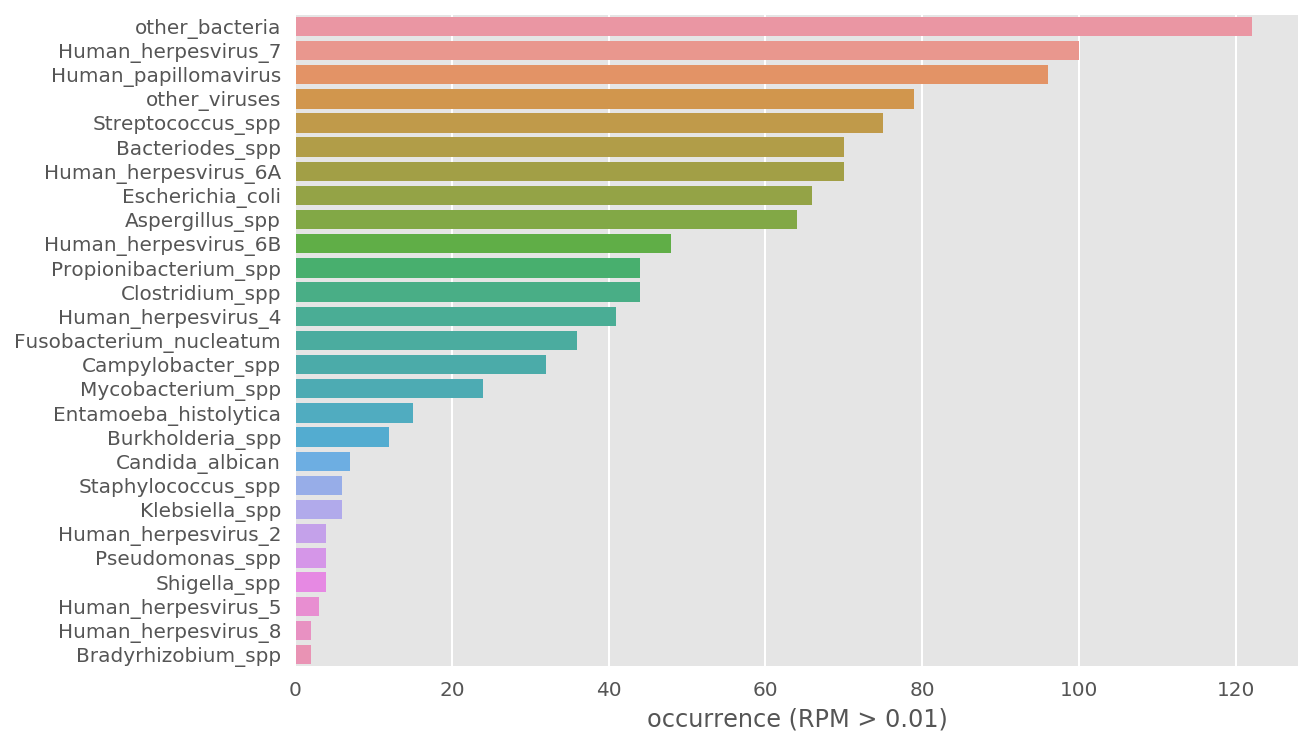

In [106]:
# Swarm plot
ax = sns.barplot( 'occurrence','microbes', data = odf)
# pass
ax.set(xlabel='occurrence (RPM > 0.01)', ylabel='')
of ='/projects/trans_scratch/validations/workspace/szong/Cervical/bbt/124_patients/microbes_detected.png'
plt.savefig(of,  dpi=200, bbox_inches='tight')

In [116]:
dfm['Human_herpesvirus_7_add_0.0001'] = dfm['Human_herpesvirus_7'] + 0.0001

In [125]:
dfm['Human_papillomavirus_add_0.0001'] = dfm['Human_papillomavirus'] + 0.0001

In [126]:
# value_cols = #['Aspergillus_spp', 'Bacteriodes_spp', 'Bradyrhizobium_spp',
#        'Burkholderia_spp', 'Campylobacter_spp', 'Candida_albican',
#        'Clostridium_spp', 'Cryptococcus_spp', 'Entamoeba_histolytica',
#        'Escherichia_coli', 'Fusobacterium_nucleatum']#,
# value_cols =        ['Gordonia_polyisoprenivorans', 'Helicobacter_pylori',
#        'Human_adenoviruses', 'Human_herpesvirus_2', 'Human_herpesvirus_4',
#        'Human_herpesvirus_5', 'Human_herpesvirus_6A', 'Human_herpesvirus_6B',
#        'Human_herpesvirus_7', 'Human_herpesvirus_8', 'Human_papillomavirus',
#        'Klebsiella_spp', 'Listeria_spp', 'Mycobacterium_spp', 'Polyomaviruses',
#        'Propionibacterium_spp', 'Pseudomonas_spp', 'Ralstonia_spp',
#        'Saccharomyces_cerevisiae', 'Shigella_spp', 'Sphingomonas_spp',
#        'Staphylococcus_spp', 'Streptococcus_spp', 'other_bacteria',
#        'other_viruses']
value_cols = ['total', 'other_bacteria','Human_herpesvirus_7_add_0.0001', 'Human_papillomavirus_add_0.0001']
# should not use total need to minus phix and vector

/home/szong/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


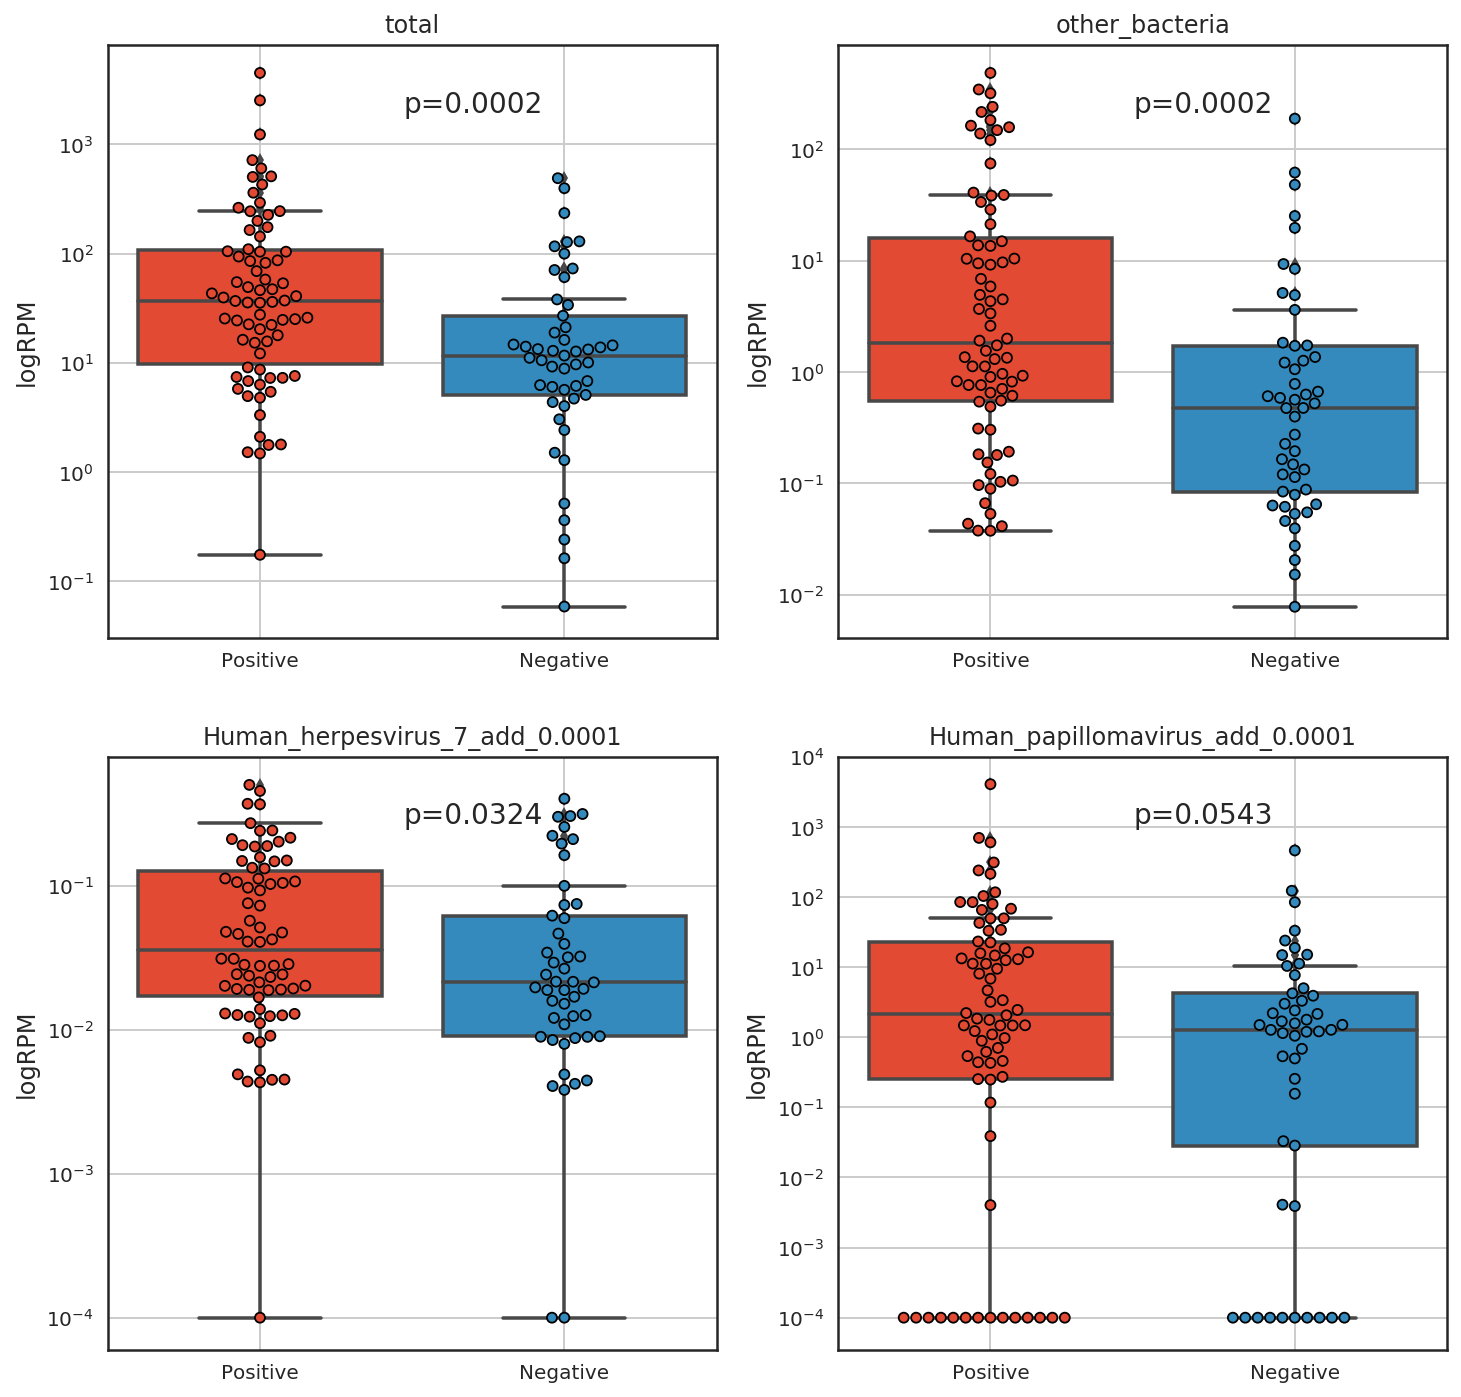

In [128]:
titles = value_cols
df = dfm.copy()
# gene = 'SF3B1'
# boxplot overlaps individual data point
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig = plt.figure(facecolor='w', figsize=(12,12))

    gs = gridspec.GridSpec(int(len(value_cols)/3.0)+1, 2)
    group_col = 'reanne_HIV_status'
    categories = sorted(df[group_col].unique().tolist(), reverse=True) 
    p_values = {}
    for k, col in enumerate(value_cols):
#         print(k, col)
        ax = fig.add_subplot(gs[k])
        _ = ax.set_yscale("log")
        value_col = col
        _ = sns.swarmplot(x=group_col, y=col, data=df, edgecolor="black", linewidth=.9)
        _ = sns.boxplot(x=group_col, y=col, data=df, saturation=1, ax=ax)

        grps = {}
        # overlay actuall data point
        for i, cat in enumerate(categories):
            grps[i] = df.query('{0} == "{1}"'.format(group_col, cat))[col]

        
        # statistical test for 1st grp
        sts, p = ss.mannwhitneyu(grps[0], grps[1], use_continuity=True, alternative=None)
        p = round(p, 4)
        _ = ax.text(0.6, 0.90,'p={}'.format(p), ha='center', va='center', transform=ax.transAxes, size=14) 
#         ax.tick_params(axis='x', labelsize=18) #specify x tick label size
#         _ = ax.set_xticks(range(position+1))
#         _ = ax.set_xticklabels(categories, rotation=0)
        _ = ax.set_title('{}'.format(titles[k]), fontsize=12)
#         _ = ax.set_xlim(xmin=-0.5)
#         _= ax.set_ylabel('spicing events', fontsize=12)
        ax.set_xlabel('')
        ax.set_ylabel('logRPM')
        ax.grid(True)

#     plt.suptitle('', fontsize=14)       
    of = '/projects/trans_scratch/validations/workspace/szong/Cervical/bbt/124_patients/124_microbial_load.png'
    plt.savefig(of, dpi=200, box_inches='tight')
plt.show()
plt.close()

In [9]:
ndf = dfj[dfj>0.01].count(axis=1).sort_values(ascending=False).to_frame()
# is vectors /phiX still in the list?

In [10]:
ndf.head()

,0
1,
other_bacteria,123
vectors,101
Human_herpesvirus_7,100
Human_papillomavirus,97
other_viruses,79


In [84]:
# ndf = ndf.reset_index()

In [11]:
ndf

,0
1,
other_bacteria,123
vectors,101
Human_herpesvirus_7,100
Human_papillomavirus,97
other_viruses,79
Streptococcus_spp,75
Bacteriodes_spp,70
Human_herpesvirus_6A,70
Escherichia_coli,67


In [13]:
ndf.T

1,other_bacteria,vectors,Human_herpesvirus_7,Human_papillomavirus,other_viruses,Streptococcus_spp,Bacteriodes_spp,Human_herpesvirus_6A,Escherichia_coli,Aspergillus_spp,...,Bradyrhizobium_spp,Helicobacter_pylori,Gordonia_polyisoprenivorans,Sphingomonas_spp,Cryptococcus_spp,Saccharomyces_cerevisiae,Ralstonia_spp,Listeria_spp,Polyomaviruses,Human_adenoviruses
0,123,101,100,97,79,75,70,70,67,64,...,2,0,0,0,0,0,0,0,0,0


In [14]:
odf = ndf.T[bugs].T.reset_index()

In [15]:
odf = odf.rename(columns={1:"microbes", 0:'occurrence'})

,microbes,occurrence
0,Human_papillomavirus,97
1,Bacteriodes_spp,70
2,Streptococcus_spp,75
3,Human_herpesvirus_7,100
4,Aspergillus_spp,64
5,Fusobacterium_nucleatum,36
6,Clostridium_spp,44
7,Escherichia_coli,67
8,Campylobacter_spp,32
9,Shigella_spp,4


/home/szong/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


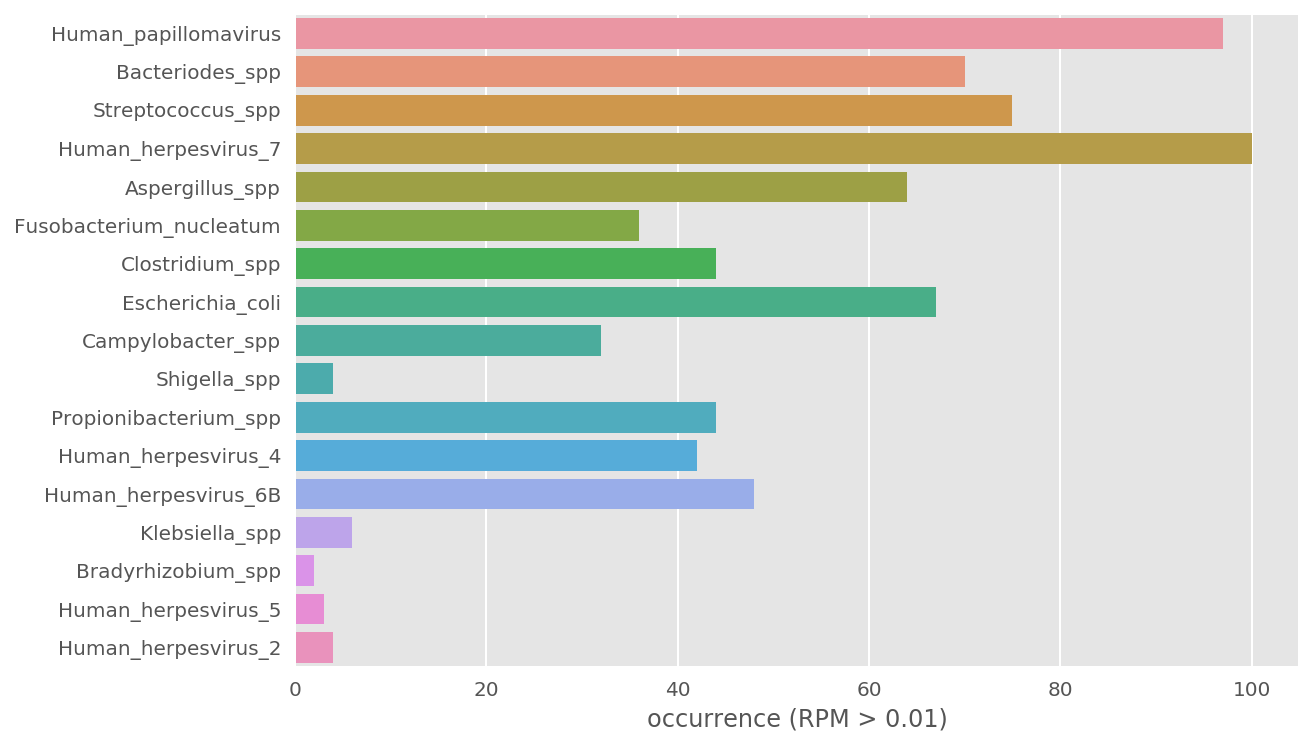

In [18]:
# Swarm plot
ax = sns.barplot( 'occurrence','microbes', data = odf)
# pass
ax.set(xlabel='occurrence (RPM > 0.01)', ylabel='')
plt.savefig('output.png',  bbox_inches='tight')

In [261]:
# read in microbial species
f2 = '/projects/trans_scratch/validations/workspace/szong/Cervical/bbt/101_patients/microbials_detected_by_bbt.txt'
bdf = pd.read_csv(f2, header=None, names=['microbes'])
bdf.head()

microbes = bdf.microbes.tolist()
dfj = dfj.reindex(microbes).fillna(0)
dfj.head(2)

dfj.loc['total'] = dfj.sum()
dfj.head(2)

dfj = dfj.T
dfj.head(2)

,microbes
0,Burkholderia_spp
1,Campylobacter_spp
2,Chlamydia_spp
3,Clostridium_spp
4,Escherichia_coli


,HTMCP-03-06-02001,HTMCP-03-06-02002,HTMCP-03-06-02003,HTMCP-03-06-02006,HTMCP-03-06-02007,HTMCP-03-06-02008,HTMCP-03-06-02012,HTMCP-03-06-02013,HTMCP-03-06-02020,HTMCP-03-06-02026,...,HTMCP-03-06-02328,HTMCP-03-06-02330,HTMCP-03-06-02332,HTMCP-03-06-02333,HTMCP-03-06-02335,HTMCP-03-06-02340,HTMCP-03-06-02341,HTMCP-03-06-02344,HTMCP-03-06-02346,HTMCP-03-06-02354
1,,,,,,,,,,,,,,,,,,,,,
Burkholderia_spp,0.709023,0.395721,0.367941,0.237074,0.646341,0.522237,1.23325,0.413484,0.198167,0.48681,...,0.0,0.13037,0.157515,0.466054,1.82957,0.0,0.225613,0.0,0.153017,0.133091
Campylobacter_spp,0.000000,0.000000,0.490588,0.000000,0.092334,1.253370,0.00000,1.550560,0.000000,0.00000,...,0.0,0.13037,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000


,HTMCP-03-06-02001,HTMCP-03-06-02002,HTMCP-03-06-02003,HTMCP-03-06-02006,HTMCP-03-06-02007,HTMCP-03-06-02008,HTMCP-03-06-02012,HTMCP-03-06-02013,HTMCP-03-06-02020,HTMCP-03-06-02026,...,HTMCP-03-06-02328,HTMCP-03-06-02330,HTMCP-03-06-02332,HTMCP-03-06-02333,HTMCP-03-06-02335,HTMCP-03-06-02340,HTMCP-03-06-02341,HTMCP-03-06-02344,HTMCP-03-06-02346,HTMCP-03-06-02354
1,,,,,,,,,,,,,,,,,,,,,
Burkholderia_spp,0.709023,0.395721,0.367941,0.237074,0.646341,0.522237,1.23325,0.413484,0.198167,0.48681,...,0.0,0.13037,0.157515,0.466054,1.82957,0.0,0.225613,0.0,0.153017,0.133091
Campylobacter_spp,0.000000,0.000000,0.490588,0.000000,0.092334,1.253370,0.00000,1.550560,0.000000,0.00000,...,0.0,0.13037,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000


1,Burkholderia_spp,Campylobacter_spp,Chlamydia_spp,Clostridium_spp,Escherichia_coli,Bacteriodes_spp,other_bacteria,Fusobacterium_nucleatum,Helicobacter_pylori,Klebsiella_spp,...,Human_herpesvirus_7,Human_herpesvirus_8,Human_immunodeficiency_virus,Human_papillomavirus,Human_T_lymphotropic_virus,other_viruses,Polyomaviruses,Rotaviruses,Sphingomonas_spp,total
HTMCP-03-06-02001,0.709023,0.0,0.0,0.0,1.65439,0.0,46.0865,0.0,0.0,0.0,...,0.0,0.0,0.0,3979.98,0.0,0.472682,1.06353,0.0,0.000000,4056.790826
HTMCP-03-06-02002,0.395721,0.0,0.0,0.0,2.57219,0.0,79.3421,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.791442,1.78075,0.0,0.296791,135.435651


In [177]:
# fixed histology
f22 = '/projects/trans_scratch/validations/workspace/szong/Cervical/HIV_cervical_analysis_master_tables_20170929.xls'
# f22 = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/107_patients/aaaa.xls'
cdf = pd.read_excel(f22, sheetname='partial_clinic', index_col='bcr_patient_barcode')
ddf = pd.read_excel(f22, sheetname='meta', index_col='patient')
cdf.head(2)
ddf.head()

,birth_days_to,menopause_status,height_cm_at_diagnosis,weight_kg_at_diagnosis,history_hormonal_contraceptives_use,live_birth_pregnancy_count,total_pregnancy_count,pregnancies_count_miscarriage,pregnancies_count_induced_abortion,karnofsky_score,...,histologic_diagnosis,haart_therapy_prior_to_dx,haart_therapy_at_dx,age_at_diagnosis,keratinization_squamous_cell,tumor_grade,ajcc_tumor_clinical_ct,clinical_stage,days_to_hiv_diagnosis,patient_id
bcr_patient_barcode,,,,,,,,,,,,,,,,,,,,,
HTMCP-03-06-02001,NaN,Post (prior bilateral ovariectomy OR >12 mo si...,158.0,44.5,Former User,5,6,1.0,NaN,70.0,...,Squamous Cell Carcinoma; Non-Keratinizing,YES,YES,56.0,Non-keratinizing squamous cell carcinoma,G2,T2b,Stage IIB,NaN,2001
HTMCP-03-06-02002,-22934.0,Post (prior bilateral ovariectomy OR >12 mo si...,159.0,70.2,Former User,8,11,NaN,3.0,90.0,...,Squamous Cell Carcinoma; Non-Keratinizing,NaN,NaN,62.0,Non-keratinizing squamous cell carcinoma,G3,T1b1,Stage IB1,NaN,2002


,reanne_HIV_status,HPV_status,Clinical_histology,reanne_Putative_histology,comments
patient,,,,,
HTMCP-03-06-02001,Positive,Positive,Squamous Non-Keratinizing,Squamous,NaN
HTMCP-03-06-02002,Negative,Positive,Squamous Non-Keratinizing,Squamous,NaN
HTMCP-03-06-02003,Positive,Positive,Squamous Non-Keratinizing,Squamous,NaN
HTMCP-03-06-02006,Negative,Positive,Squamous Non-Keratinizing,Squamous,NaN
HTMCP-03-06-02007,Negative,Negative,Squamous Non-Keratinizing,Adeno,NaN


In [136]:
# for c in cdf.columns:
#     print(c)

In [137]:
# cdf1.sort_values('hiv_rna_load_at_diagnosis', ascending=False)

In [138]:
# cdf.query('hiv_status == "Positive"')[['hiv_rna_load_at_diagnosis']].sort_values('hiv_rna_load_at_diagnosis')

In [139]:
cols = ['hiv_rna_load_at_diagnosis','nadir_cd4_counts', 'cd4_counts_at_diagnosis', 'hiv_status','haart_therapy_prior_to_dx', 'haart_therapy_at_dx', 'days_to_hiv_diagnosis' ]
coli = [cols[i] for i in [0,2,3]]
cdf1 = cdf[coli].sort_values(cols[0])
cdf1
# plt.plot(cdf[cols[0]], cdf[cols[2]])
# plt.scatter(cdf1.hiv_rna_load_at_diagnosis, cdf1.cd4_counts_at_diagnosis)

,hiv_rna_load_at_diagnosis,cd4_counts_at_diagnosis,hiv_status
bcr_patient_barcode,,,
HTMCP-03-06-02144,0.0,486.0,Positive
HTMCP-03-06-02113,0.0,361.0,Positive
HTMCP-03-06-02110,0.0,427.0,Positive
HTMCP-03-06-02152,0.0,373.0,Positive
HTMCP-03-06-02103,0.0,286.0,Positive
HTMCP-03-06-02097,0.0,406.0,Positive
HTMCP-03-06-02089,0.0,349.0,Positive
HTMCP-03-06-02170,0.0,364.0,Positive
HTMCP-03-06-02173,0.0,347.0,Positive


In [140]:
dfj.head()

1,Burkholderia_spp,Campylobacter_spp,Chlamydia_spp,Clostridium_spp,Escherichia_coli,Bacteriodes_spp,other_bacteria,Fusobacterium_nucleatum,Helicobacter_pylori,Klebsiella_spp,...,Human_herpesvirus_7,Human_herpesvirus_8,Human_immunodeficiency_virus,Human_papillomavirus,Human_T_lymphotropic_virus,other_viruses,Polyomaviruses,Rotaviruses,Sphingomonas_spp,total
HTMCP-03-06-02001,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.037623,0.000000,0.0,0.0,...,0.000000,0.0,0.0,3.19798,0.0,0.011287,0.0,0.0,0.0,3.322137
HTMCP-03-06-02002,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.007825,0.000000,0.0,0.0,...,0.019563,0.0,0.0,0.00000,0.0,0.003913,0.0,0.0,0.0,0.058688
HTMCP-03-06-02003,0.0,0.050165,0.0,0.087789,0.0,8.494620,28.740400,0.000000,0.0,0.0,...,0.012541,0.0,0.0,1.84357,0.0,0.008361,0.0,0.0,0.0,39.609504
HTMCP-03-06-02006,0.0,0.000000,0.0,0.021038,0.0,32.697000,5.133220,0.000000,0.0,0.0,...,0.016830,0.0,0.0,0.00000,0.0,0.004208,0.0,0.0,0.0,38.032183
HTMCP-03-06-02007,0.0,0.018742,0.0,0.026239,0.0,0.835895,3.617210,0.127446,0.0,0.0,...,0.018742,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,4.700500


In [178]:
dfm = pd.merge(dfj, cdf, left_index=True, right_index=True, how='left')
dfm = pd.merge(dfm, ddf, left_index=True, right_index=True, how='left')
dfm = dfm.drop('HTMCP-03-06-02061')

In [179]:
dfm.head(2)

,Burkholderia_spp,Campylobacter_spp,Chlamydia_spp,Clostridium_spp,Escherichia_coli,Bacteriodes_spp,other_bacteria,Fusobacterium_nucleatum,Helicobacter_pylori,Klebsiella_spp,...,tumor_grade,ajcc_tumor_clinical_ct,clinical_stage,days_to_hiv_diagnosis,patient_id,reanne_HIV_status,HPV_status,Clinical_histology,reanne_Putative_histology,comments
HTMCP-03-06-02001,0.0,0.0,0.0,0.0,0.0,0.0,0.037623,0.0,0.0,0.0,...,G2,T2b,Stage IIB,NaN,2001.0,Positive,Positive,Squamous Non-Keratinizing,Squamous,NaN
HTMCP-03-06-02002,0.0,0.0,0.0,0.0,0.0,0.0,0.007825,0.0,0.0,0.0,...,G3,T1b1,Stage IB1,NaN,2002.0,Negative,Positive,Squamous Non-Keratinizing,Squamous,NaN


In [229]:
for i in dfm.columns:
    print(i)

Burkholderia_spp
Campylobacter_spp
Chlamydia_spp
Clostridium_spp
Escherichia_coli
Bacteriodes_spp
other_bacteria
Fusobacterium_nucleatum
Helicobacter_pylori
Klebsiella_spp
Listeria_spp
Mycobacterium_spp
Propionibacterium_spp
Pseudomonas_spp
Ralstonia_spp
Shigella_spp
Staphylococcus_spp
Streptococcus_spp
Yersinia_spp
Aspergillus_spp
Candida_albican
Cryptococcus_spp
Saccharomyces_cerevisiae
Entamoeba_histolytica
Bradyrhizobium_spp
Gordonia_polyisoprenivorans
Hepatitis_B_virus
Hepatitis_C_virus
Human_adenoviruses
Human_herpesvirus_1
Human_herpesvirus_2
Human_herpesvirus_3
Human_herpesvirus_4
Human_herpesvirus_5
Human_herpesvirus_6A
Human_herpesvirus_6B
Human_herpesvirus_7
Human_herpesvirus_8
Human_immunodeficiency_virus
Human_papillomavirus
Human_T_lymphotropic_virus
other_viruses
Polyomaviruses
Rotaviruses
Sphingomonas_spp
total
birth_days_to
menopause_status
height_cm_at_diagnosis
weight_kg_at_diagnosis
history_hormonal_contraceptives_use
live_birth_pregnancy_count
total_pregnancy_count

In [230]:
df = dfm[['total', 'reanne_Putative_histology', 'reanne_HIV_status', 'cd4_counts_at_diagnosis', 'hiv_rna_load_at_diagnosis']]
df.shape
df.head(2)

# df['transcriptome_logRPM'] = np.log10(df.total+1)
df['genome_logRPM'] = np.log10(df.total)
df.head(2)

(106, 5)

,total,reanne_Putative_histology,reanne_HIV_status,cd4_counts_at_diagnosis,hiv_rna_load_at_diagnosis
HTMCP-03-06-02001,3.322137,Squamous,Positive,337.0,34.0
HTMCP-03-06-02002,0.058688,Squamous,Negative,NaN,NaN


/home/szong/anaconda3/envs/szvenv/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,total,reanne_Putative_histology,reanne_HIV_status,cd4_counts_at_diagnosis,hiv_rna_load_at_diagnosis,genome_logRPM
HTMCP-03-06-02001,3.322137,Squamous,Positive,337.0,34.0,0.521418
HTMCP-03-06-02002,0.058688,Squamous,Negative,NaN,NaN,-1.231448


In [146]:
cdf1.head()

,hiv_rna_load_at_diagnosis,cd4_counts_at_diagnosis,hiv_status
bcr_patient_barcode,,,
HTMCP-03-06-02144,0.0,486.0,Positive
HTMCP-03-06-02113,0.0,361.0,Positive
HTMCP-03-06-02110,0.0,427.0,Positive
HTMCP-03-06-02152,0.0,373.0,Positive
HTMCP-03-06-02103,0.0,286.0,Positive


In [207]:
# dfm.columns

look at cervical cancer relevant microbial risk factors: Chlamydia_spp, Human_papillomavirus, Human_immunodeficiency_virus. NO significant difference between HIV+ and - in each individual speciees except other_bacteria.
    

In [147]:
df.reanne_HIV_status.value_counts()

Positive    56
Negative    48
Name: reanne_HIV_status, dtype: int64

0 0 is 465527.84553592856
0 1 is 8763.167037718371
1 0 is 1.219145108634956
1 1 is 0.819817318344837


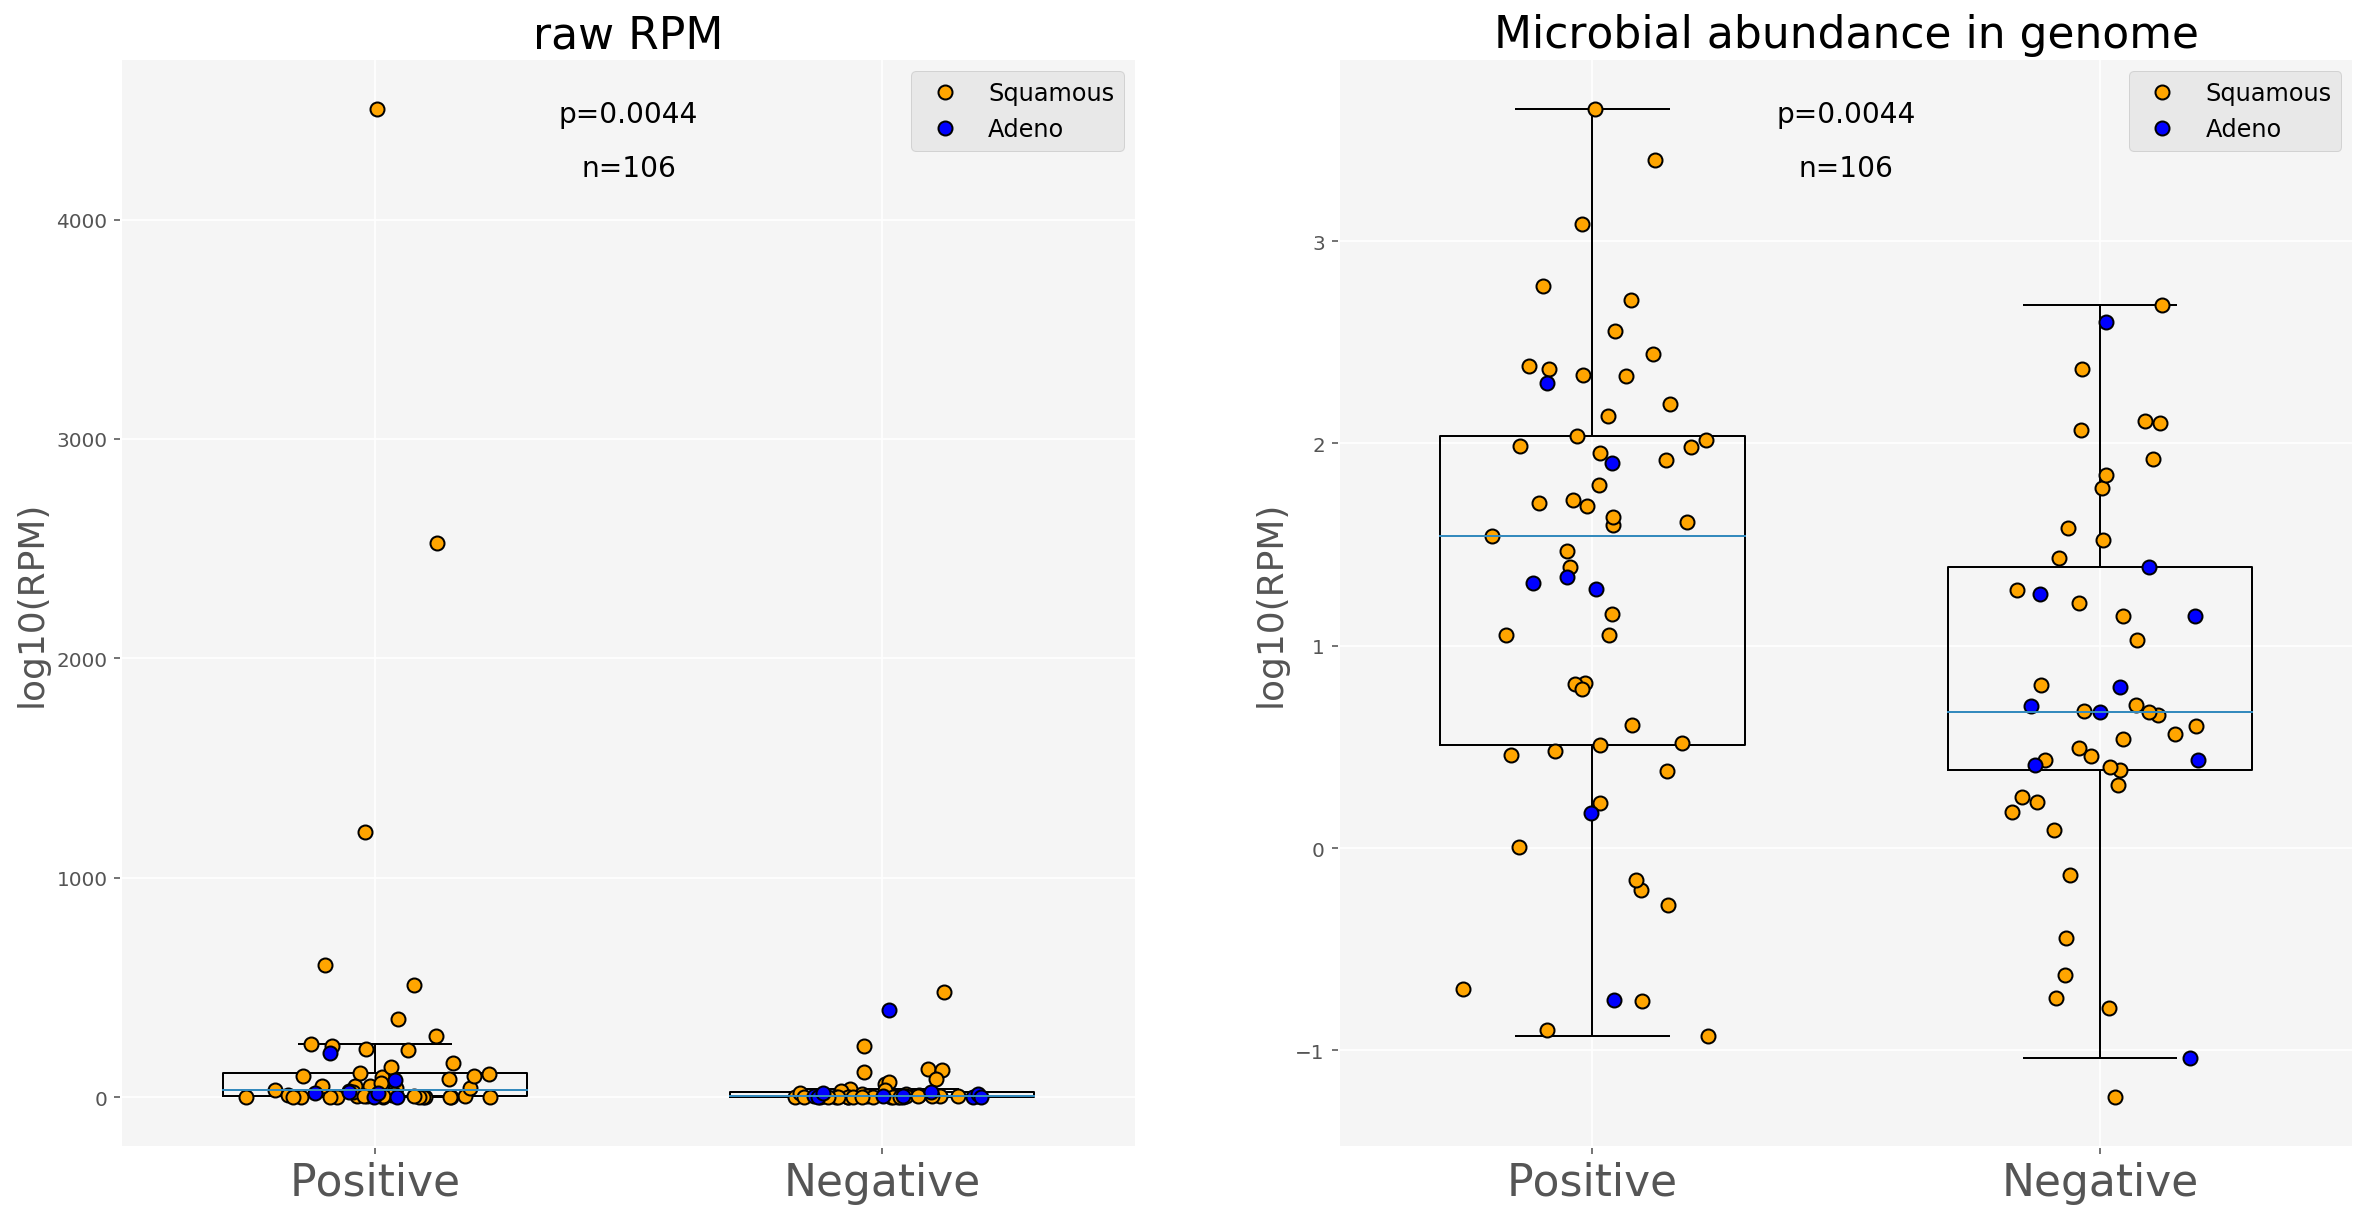

In [242]:
# value_cols = ['total', 'transcriptome_logRPM']
# titles = ['transcriptome', 'Transcriptome']

value_cols = [ 'total','genome_logRPM']
titles = ['raw RPM', 'Microbial abundance in genome']
# boxplot overlaps individual data point
fig, axes = plt.subplots(int(len(value_cols)/2.0), 2, figsize=(20, 10))
axes = axes.ravel()
# group_col = 'combo'
group_col = 'reanne_HIV_status'
tissue_col = 'reanne_Putative_histology'
categories = sorted(df[group_col].unique().tolist(), reverse=True) 
tissues = sorted(df[tissue_col].unique().tolist(), reverse=True)
p_values = {}
for k, col in enumerate(value_cols):
    ax = axes[k]
    value_col = col
    for position, cat in enumerate(categories):
        _ = ax.boxplot(df.query('{0} == "{1}"'.format(group_col, cat))[col], 
                   positions=[position], widths=(0.6), showfliers=False
                  )

    np.random.seed(0)
    grps = {}
    # overlay actuall data point based on tissue types
    for i, cat in enumerate(categories):
        # add jitter and specify maker facecolor and edgecolor               
        for j, tissue in enumerate(tissues):
            y = (df.query('{0}=="{1}" & {2}=="{3}"'.format(group_col, cat, tissue_col, tissue))[value_col])
            x = np.random.normal(i, 0.1, size=len(y))
    #         ax.scatter(x, y, s=30)
            lb = '' if i == 0 else tissue
            _ = ax.plot(x, y, mfc = ["orange","blue","yellow", "black"][j], 
                           mec='k', ms=7, marker="o", linestyle="None", label=lb)
            grps[i] = df.query('{0} == "{1}"'.format(group_col, cat))[col]
#         show the unequal variance of each group, not equal
        print('{0} {1} is {2}'.format(k, i, np.var(grps[i])))
    # statistical test for 1st grp, normally distributed, t test is used
    stats, p_U = ss.mannwhitneyu(grps[0], grps[1], use_continuity=True, alternative=None)
    p_U = round(p_U, 4)
    _ = ax.text(0.5, 0.95,'p={}'.format(p_U), ha='center', va='center', transform=ax.transAxes, size=14) 
    _ = ax.text(0.5, 0.90,'n={}'.format(106), ha='center', va='center', transform=ax.transAxes, size=14) 

#     statsT, p_T = ss.ttest_ind(grps[0], grps[1])
#     p_T = round(p_T, 4)
#     print(col, p_T)
#     _ = ax.text(0.5, 0.90,'p={}'.format(p_T), ha='center', va='center', transform=ax.transAxes, size=14)     

    _ = ax.set_facecolor('whitesmoke') #specify plot backgroup color
    _ = ax.tick_params(axis='x', labelsize=14) #specify x tick label size
    _ = ax.set_xticks(range(position+1))
    _ = ax.set_xticklabels(categories, rotation=0, fontsize=22)
#     ax.set_title(col)
    _ = ax.set_title('{}'.format(titles[k]), fontsize=22)
    _ = ax.set_xlim(xmin=-0.5)
    _= ax.set_ylabel('log10(RPM)', fontsize=18)
    ax.grid(True)
    _ = ax.legend(scatterpoints=1,
              loc='upper right',
              ncol=1,
              fontsize=12)
plt.suptitle('', fontsize=14)       
plt.savefig('/projects/trans_scratch/validations/workspace/szong/Cervical/bbt/107_patients/microbial_load_HIV_plots.png', dpi=200)


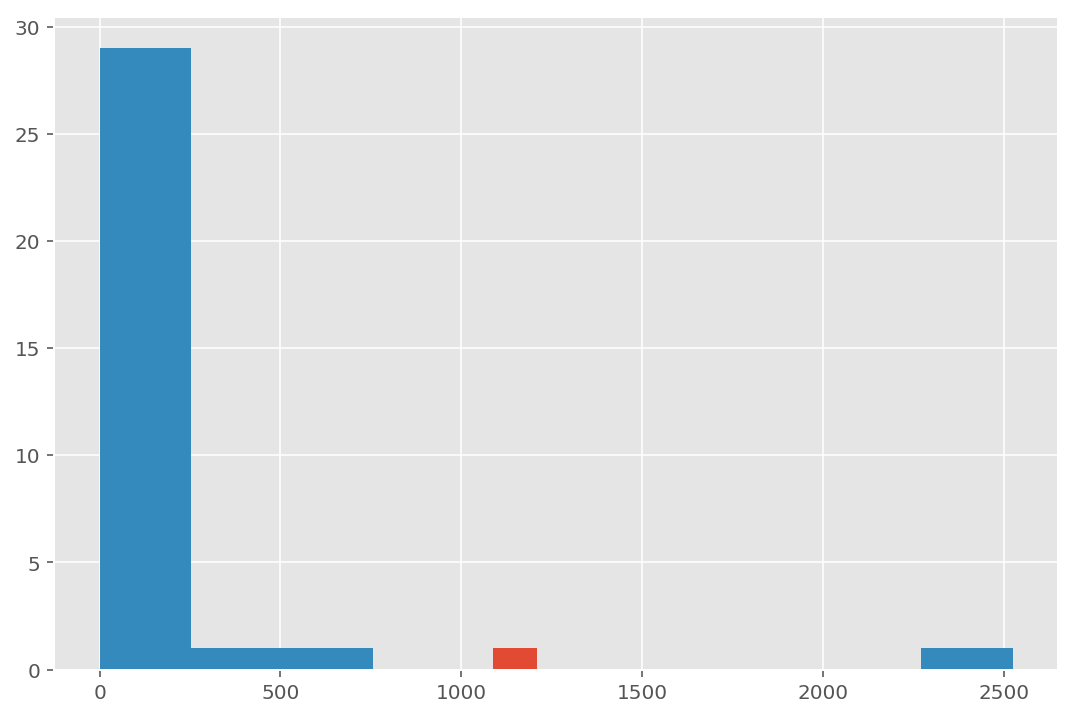

In [224]:
dfm[dfm.cd4_counts_at_diagnosis>500]['total'].hist()

dfm[dfm.cd4_counts_at_diagnosis<500]['total'].drop('HTMCP-03-06-02205').sort_values().hist()

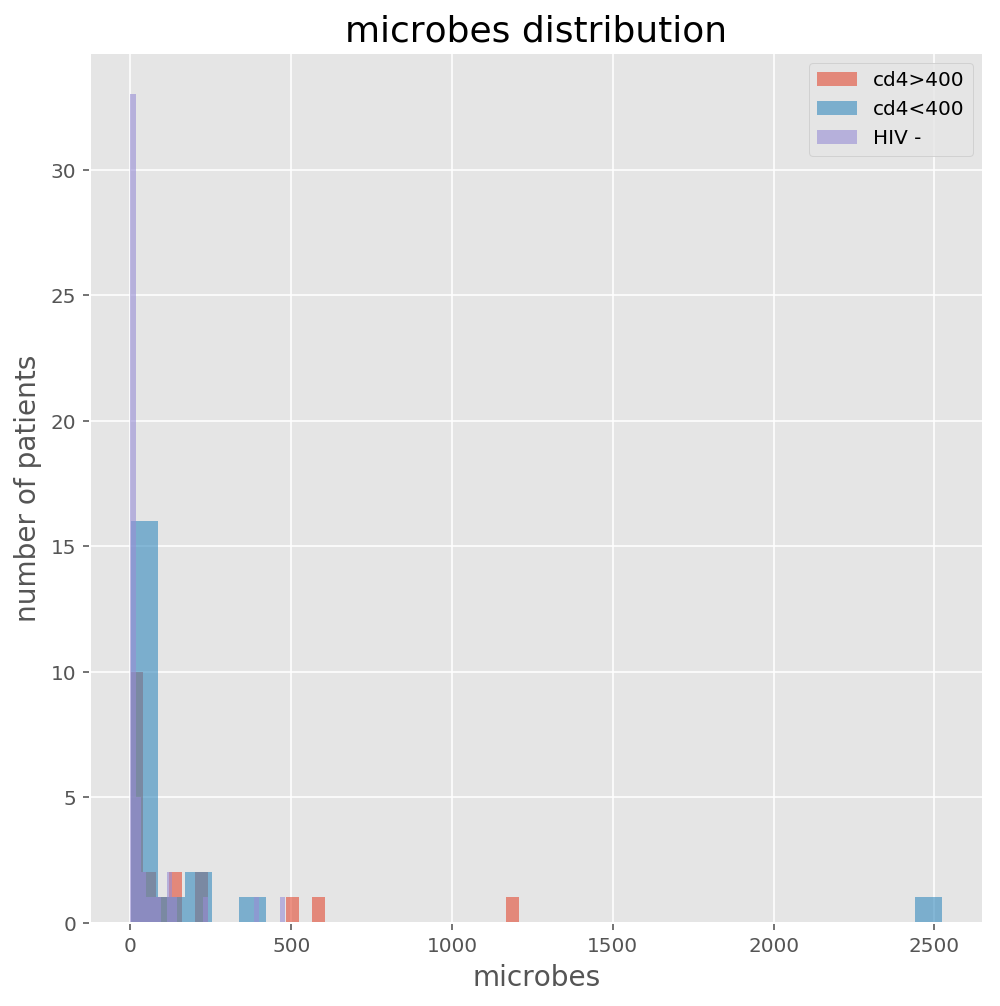

In [225]:
# fig, ax = plt.subplots(figsize=(8, 6))
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
cd4 = 400
_ = ax.hist(dfm.query('{0}>{1}'.format('cd4_counts_at_diagnosis', cd4))['total'], bins=30,alpha=0.6, label=('{0}>{1}'.format('cd4', cd4)))
_ = ax.hist(dfm.query('{0}<{1}'.format('cd4_counts_at_diagnosis', cd4))['total'].drop('HTMCP-03-06-02205'), bins=30,alpha=0.6, label=('{0}<{1}'.format('cd4', cd4)))
_ = ax.hist(dfm.query('{0}=="{1}"'.format('reanne_HIV_status', 'Negative'))['total'], bins=30,alpha=0.6, label='HIV -')

# dfm.query('hiv_status == "Positive"')['age_at_diagnosis'].hist(bins=30,alpha=0.6, label='HIV +')
# dfm.query('hiv_status == "Negative"')['age_at_diagnosis'].hist(bins=30, alpha=0.6, label='HIV -')
_ = plt.legend(loc='upper right')
plt.title('microbes distribution', fontsize=18)
plt.xlabel('microbes', fontsize=14)
plt.ylabel('number of patients',fontsize=14)

In [228]:
df.head()

,total,reanne_Putative_histology,reanne_HIV_status,genome_logRPM
HTMCP-03-06-02001,3.322137,Squamous,Positive,0.521418
HTMCP-03-06-02002,0.058688,Squamous,Negative,-1.231448
HTMCP-03-06-02003,39.609504,Squamous,Positive,1.597799
HTMCP-03-06-02006,38.032183,Squamous,Negative,1.580151
HTMCP-03-06-02007,4.700500,Adeno,Negative,0.672144


In [240]:
df['loghiv'] = np.log10(df.hiv_rna_load_at_diagnosis + 1)
df['logcd4'] = np.log10(df.cd4_counts_at_diagnosis +1)

/home/szong/anaconda3/envs/szvenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/szong/anaconda3/envs/szvenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


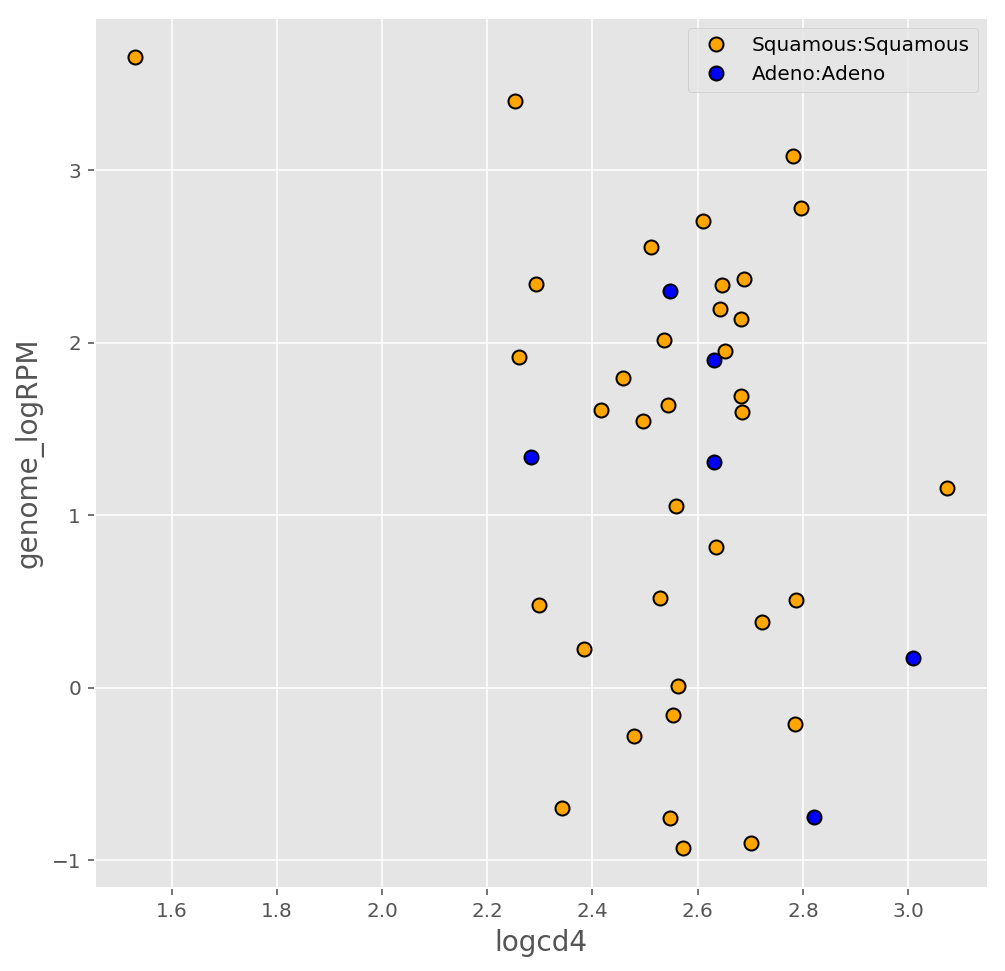

In [241]:
# look at correlation between 2 variables
df1 = df.copy()
var1 = 'logcd4'
var2 = 'genome_logRPM'

clrcol = 'reanne_Putative_histology' #color by column
clrs = sorted(df1[clrcol].unique().tolist(), reverse=True)

grpcol = 'reanne_HIV_status' #group on x axis by this column
grps = sorted(df1[grpcol].unique().tolist(), reverse=True)

colors = ["orange","blue","yellow", "black"]



fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
df2 = df1.query('{0}=="{1}"'.format(grpcol, "Positive" ))[[var1, var2, clrcol]].dropna()

for j, ctgr in enumerate(clrs):
    x = df2.query('{0}=="{1}"'.format(clrcol, ctgr))[var1]
    y = df2.query('{0}=="{1}"'.format(clrcol, ctgr))[var2]
    _ = ax.plot(x, y, mfc = colors[j], mec='k', 
                ms=7, marker="o", linestyle="None", 
                label='{0}:{1}'.format(ctgr, ctgr))
    _= ax.set_xlabel(var1, fontsize=14)
    _= ax.set_ylabel(var2, fontsize=14)
#     _=ax.set_xlim(0,1000)
ax.legend()

In [149]:
df.head(2)

,total,reanne_Putative_histology,reanne_HIV_status,genome_logRPM
HTMCP-03-06-02001,3.322137,Squamous,Positive,0.635699
HTMCP-03-06-02002,0.058688,Squamous,Negative,0.024768


In [150]:
dfn = pd.merge(df, cdf1, left_index=True, right_index=True, how='left')
dfn = pd.merge(dfn, ddf, left_index=True, right_index=True, how='left')
# dfn = dfn.drop('HTMCP-03-06-02061')

In [151]:
dfn.head(2)

,total,reanne_Putative_histology_x,reanne_HIV_status_x,genome_logRPM,hiv_rna_load_at_diagnosis,cd4_counts_at_diagnosis,hiv_status,reanne_HIV_status_y,HPV_status,Clinical_histology,reanne_Putative_histology_y,comments
HTMCP-03-06-02001,3.322137,Squamous,Positive,0.635699,34.0,337.0,Positive,Positive,Positive,Squamous Non-Keratinizing,Squamous,NaN
HTMCP-03-06-02002,0.058688,Squamous,Negative,0.024768,NaN,NaN,Negative,Negative,Positive,Squamous Non-Keratinizing,Squamous,NaN


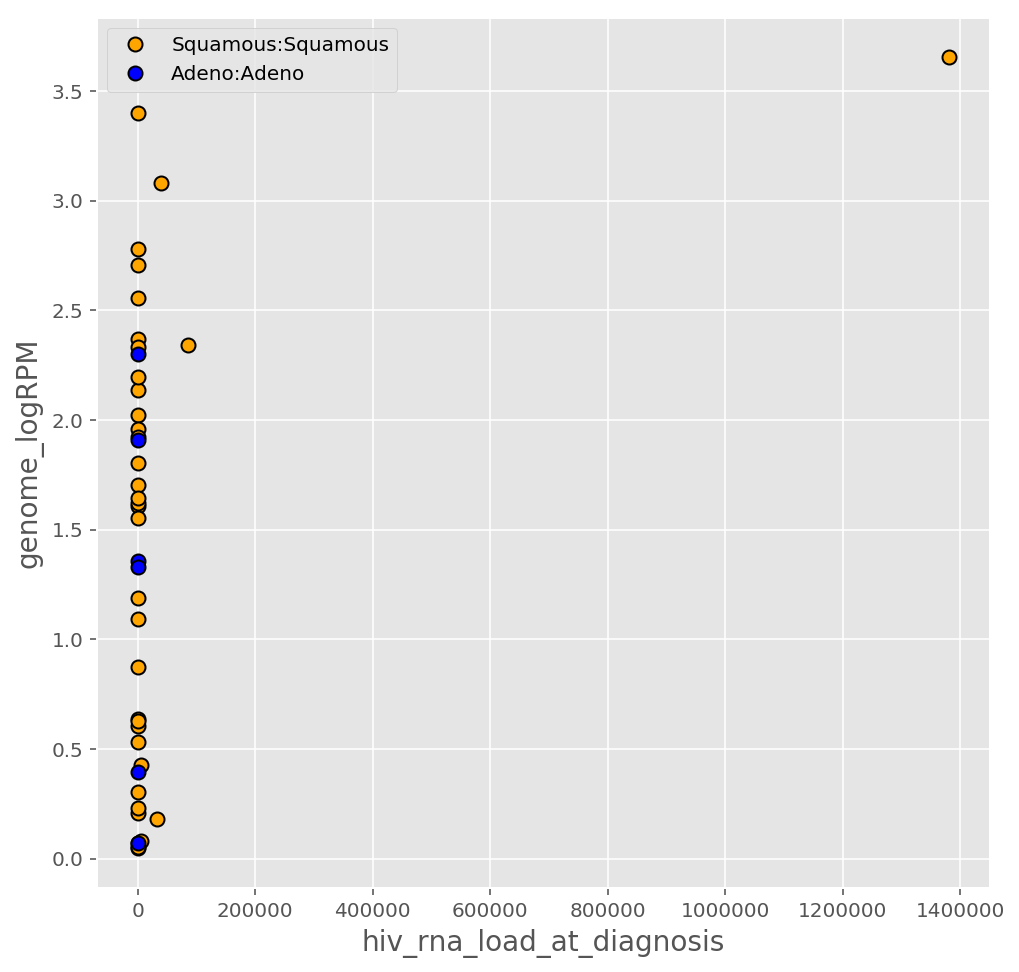

In [167]:
# look at correlation between 2 variables
df1 = dfn.copy()
var1 = 'hiv_rna_load_at_diagnosis'
var2 = 'genome_logRPM'

clrcol = 'reanne_Putative_histology_x' #color by column
clrs = sorted(df1[clrcol].unique().tolist(), reverse=True)

grpcol = 'reanne_HIV_status_x' #group on x axis by this column
grps = sorted(df1[grpcol].unique().tolist(), reverse=True)

colors = ["orange","blue","yellow", "black"]



fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
df2 = df1.query('{0}=="{1}"'.format(grpcol, "Positive" ))[[var1, var2, clrcol]].dropna()

for j, ctgr in enumerate(clrs):
    x = df2.query('{0}=="{1}"'.format(clrcol, ctgr))[var1]
    y = df2.query('{0}=="{1}"'.format(clrcol, ctgr))[var2]
    _ = ax.plot(x, y, mfc = colors[j], mec='k', 
                ms=7, marker="o", linestyle="None", 
                label='{0}:{1}'.format(ctgr, ctgr))
    _= ax.set_xlabel(var1, fontsize=14)
    _= ax.set_ylabel(var2, fontsize=14)
ax.legend()

In [5]:
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/bbt/101_patients/microbial_load.txt'
df = pd.read_csv(f, sep='\t', index_col='patient')
df.head(2)

,genome_logRPM,transcriptome_logRPM,putative_Histology,HIV_status
patient,,,,
HTMCP-03-06-02238,3.543012,4.76422,Squamous,Positive
HTMCP-03-06-02239,2.813174,5.01088,Squamous,Positive


In [9]:
# combination of histology and hiv status
df['combo'] = df[['putative_Histology', 'HIV_status']].apply(lambda x: re.sub('Negative','-','_'.join(x)), axis=1)
df['combo'] = df['combo'].apply(lambda x: re.sub('Positive','+',x))
df.head(2)

,genome_logRPM,transcriptome_logRPM,putative_Histology,HIV_status,combo
patient,,,,,
HTMCP-03-06-02238,3.543012,4.76422,Squamous,Positive,Squamous_+
HTMCP-03-06-02239,2.813174,5.01088,Squamous,Positive,Squamous_+


In [7]:
# data are not normally distributed
ss.normaltest(df.genome_logRPM)
ss.normaltest(df.transcriptome_logRPM)
ss.normaltest(df.query('HIV_status=="Positive"')['genome_logRPM'])
ss.normaltest(df.query('HIV_status=="Negative"')['transcriptome_logRPM'])

NormaltestResult(statistic=0.83285411994963821, pvalue=0.65939860759244184)

NormaltestResult(statistic=1.8522686080249504, pvalue=0.39608188689653945)

NormaltestResult(statistic=2.0710743960433797, pvalue=0.35503560526260869)

NormaltestResult(statistic=4.6053158660347, pvalue=0.09999271626294659)

0 0 is 1.2961846175756448
0 1 is 0.9416394474033009
1 0 is 0.4225127218781695
1 1 is 0.45030825994582474


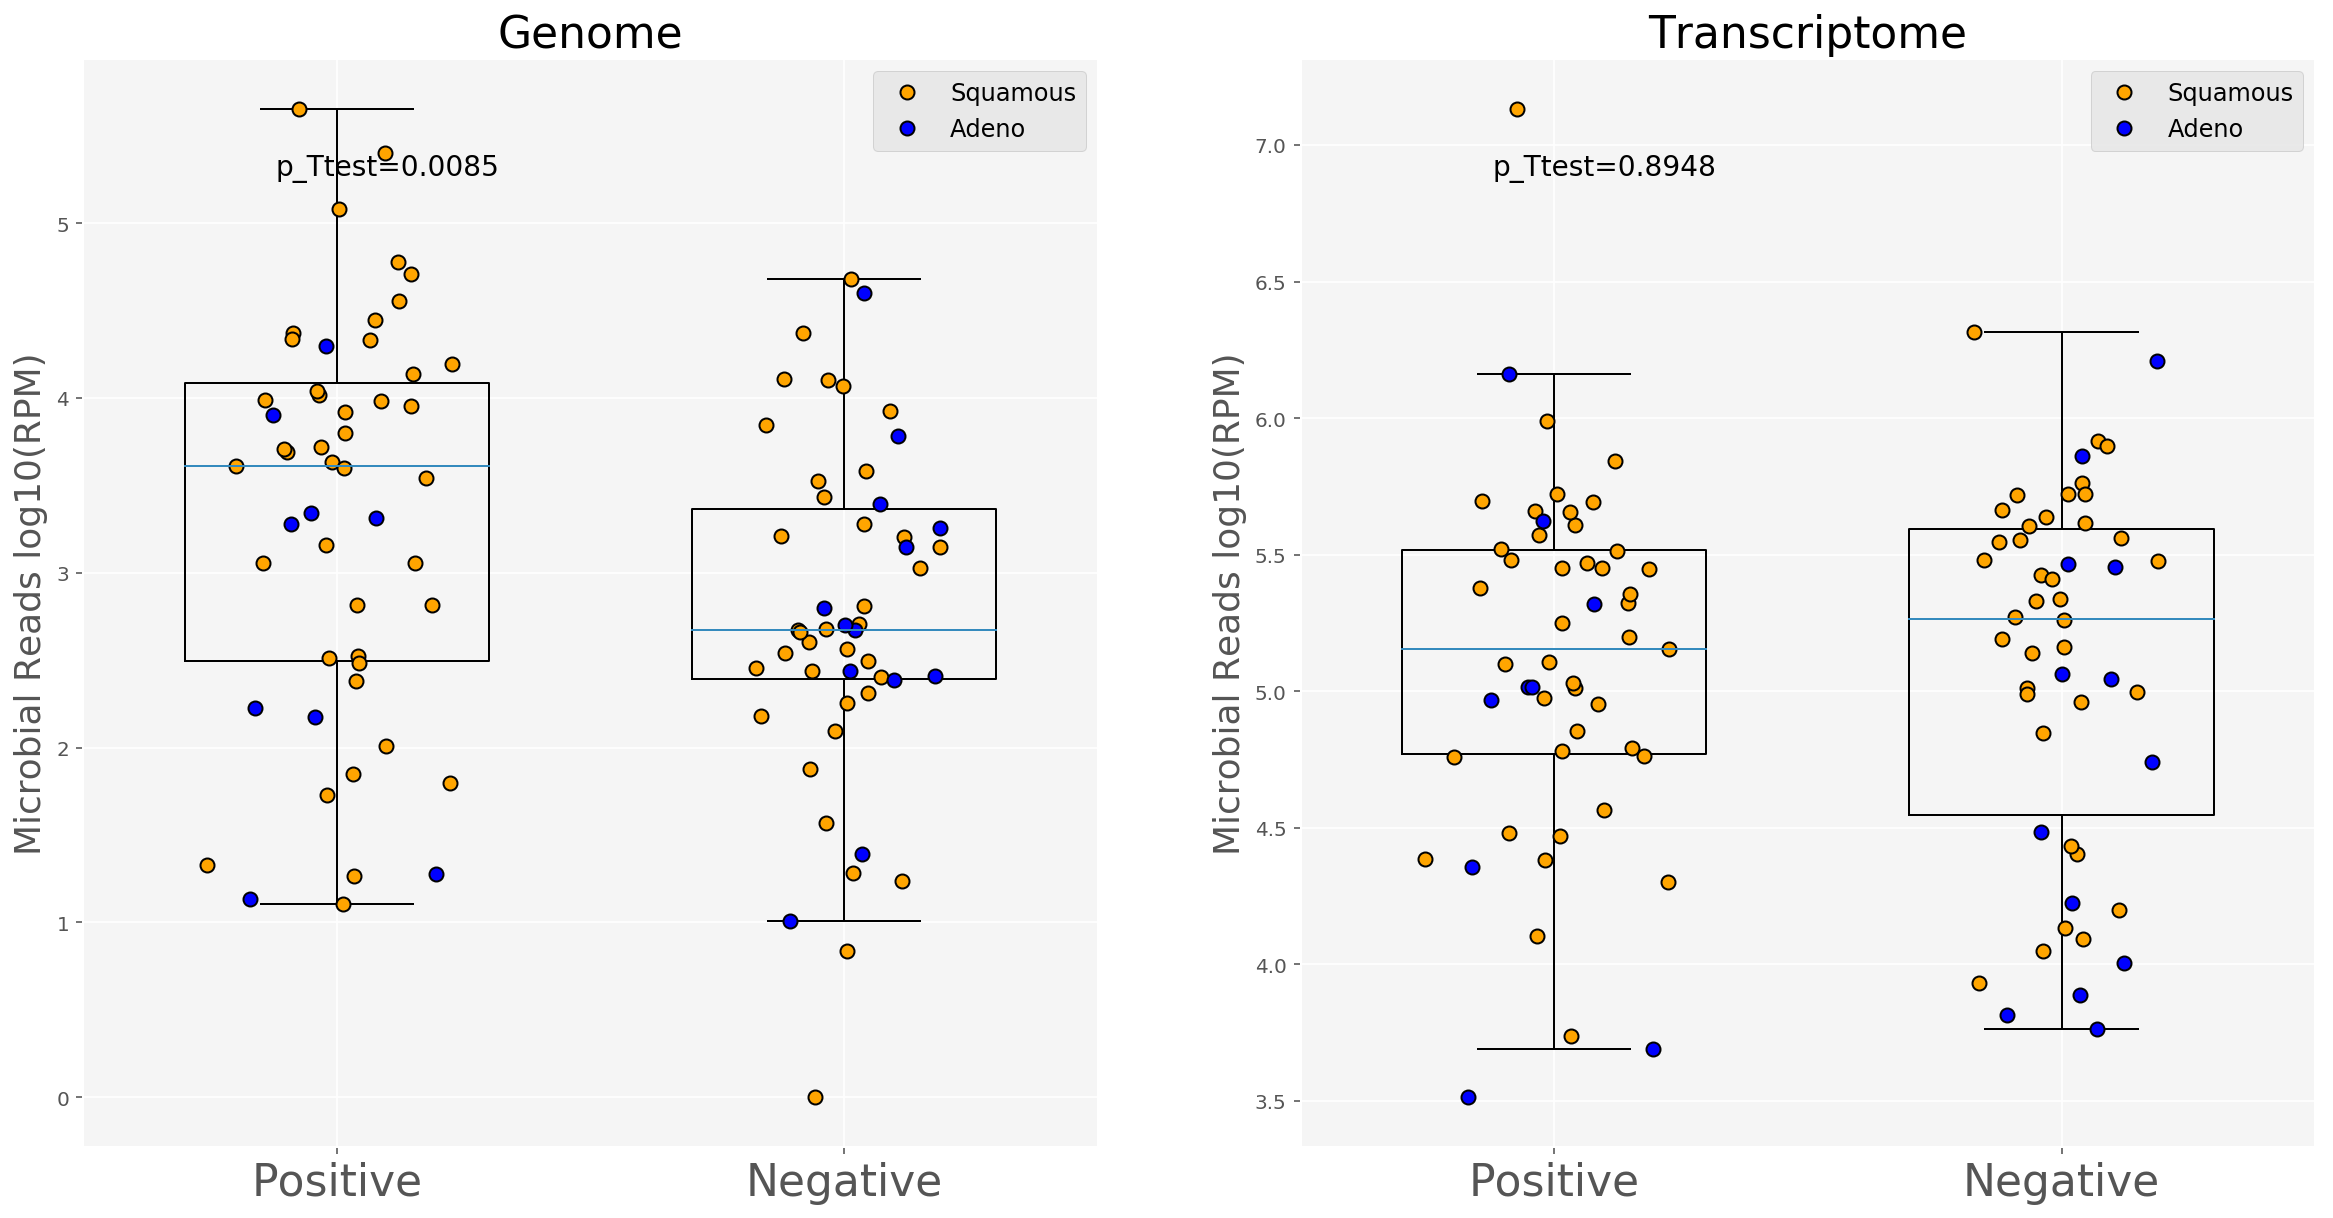

In [23]:

value_cols = ['genome_logRPM', 'transcriptome_logRPM']
# value_cols = ['strelka_total', 'hm_total']
titles = ['Genome', 'Transcriptome']
# boxplot overlaps individual data point
fig, axes = plt.subplots(int(len(value_cols)/2.0), 2, figsize=(20, 10))
axes = axes.ravel()
# group_col = 'combo'
group_col = 'HIV_status'
tissue_col = 'putative_Histology'
categories = sorted(df[group_col].unique().tolist(), reverse=True) 
tissues = sorted(df[tissue_col].unique().tolist(), reverse=True)
p_values = {}
for k, col in enumerate(value_cols):
    ax = axes[k]
    value_col = col
    for position, cat in enumerate(categories):
        _ = ax.boxplot(df.query('{0} == "{1}"'.format(group_col, cat))[col], 
                   positions=[position], widths=(0.6), showfliers=False
                  )

    np.random.seed(0)
    grps = {}
    # overlay actuall data point based on tissue types
    for i, cat in enumerate(categories):
        # add jitter and specify maker facecolor and edgecolor               
        for j, tissue in enumerate(tissues):
            y = (df.query('{0}=="{1}" & {2}=="{3}"'.format(group_col, cat, tissue_col, tissue))[value_col])
            x = np.random.normal(i, 0.1, size=len(y))
    #         ax.scatter(x, y, s=30)
            lb = '' if i == 0 else tissue
            _ = ax.plot(x, y, mfc = ["orange","blue","yellow", "black"][j], 
                           mec='k', ms=7, marker="o", linestyle="None", label=lb)
            grps[i] = df.query('{0} == "{1}"'.format(group_col, cat))[col]
#         show the unequal variance of each group, not equal
        print('{0} {1} is {2}'.format(k, i, np.var(grps[i])))
    # statistical test for 1st grp, normally distributed, t test is used
#     stats, p_U = ss.mannwhitneyu(grps[0], grps[1], use_continuity=True, alternative=None)
#     p_U = round(p_U, 4)
#     _ = ax.text(0.3, 0.95,'p_Utest={}'.format(p_U), ha='center', va='center', transform=ax.transAxes, size=14) 

    statsT, p_T = ss.ttest_ind(grps[0], grps[1])
    p_T = round(p_T, 4)
    _ = ax.text(0.3, 0.90,'p_Ttest={}'.format(p_T), ha='center', va='center', transform=ax.transAxes, size=14)     

    _ = ax.set_facecolor('whitesmoke') #specify plot backgroup color
    _ = ax.tick_params(axis='x', labelsize=14) #specify x tick label size
    _ = ax.set_xticks(range(position+1))
    _ = ax.set_xticklabels(categories, rotation=0, fontsize=22)
#     ax.set_title(col)
    _ = ax.set_title('{}'.format(titles[k]), fontsize=22)
    _ = ax.set_xlim(xmin=-0.5)
    _= ax.set_ylabel('Microbial Reads log10(RPM)', fontsize=18)
    ax.grid(True)
    _ = ax.legend(scatterpoints=1,
              loc='upper right',
              ncol=1,
              fontsize=12)
plt.suptitle('', fontsize=14)       
plt.savefig('/projects/trans_scratch/validations/workspace/szong/Cervical/bbt/101_patients/microbial_load_HIV_plots.png', dpi=200)


In [248]:
# combination of histology and hiv status
df['combo'] = df[['reanne_Putative_histology', 'reanne_HIV_status']].apply(lambda x: re.sub('Negative','-','_'.join(x)), axis=1)
df['combo'] = df['combo'].apply(lambda x: re.sub('Positive','+',x))
df.head(2)

/home/szong/anaconda3/envs/szvenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/szong/anaconda3/envs/szvenv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,total,reanne_Putative_histology,reanne_HIV_status,cd4_counts_at_diagnosis,hiv_rna_load_at_diagnosis,genome_logRPM,loghiv,logcd4,combo
HTMCP-03-06-02001,3.322137,Squamous,Positive,337.0,34.0,0.521418,1.544068,2.528917,Squamous_+
HTMCP-03-06-02002,0.058688,Squamous,Negative,NaN,NaN,-1.231448,NaN,NaN,Squamous_-


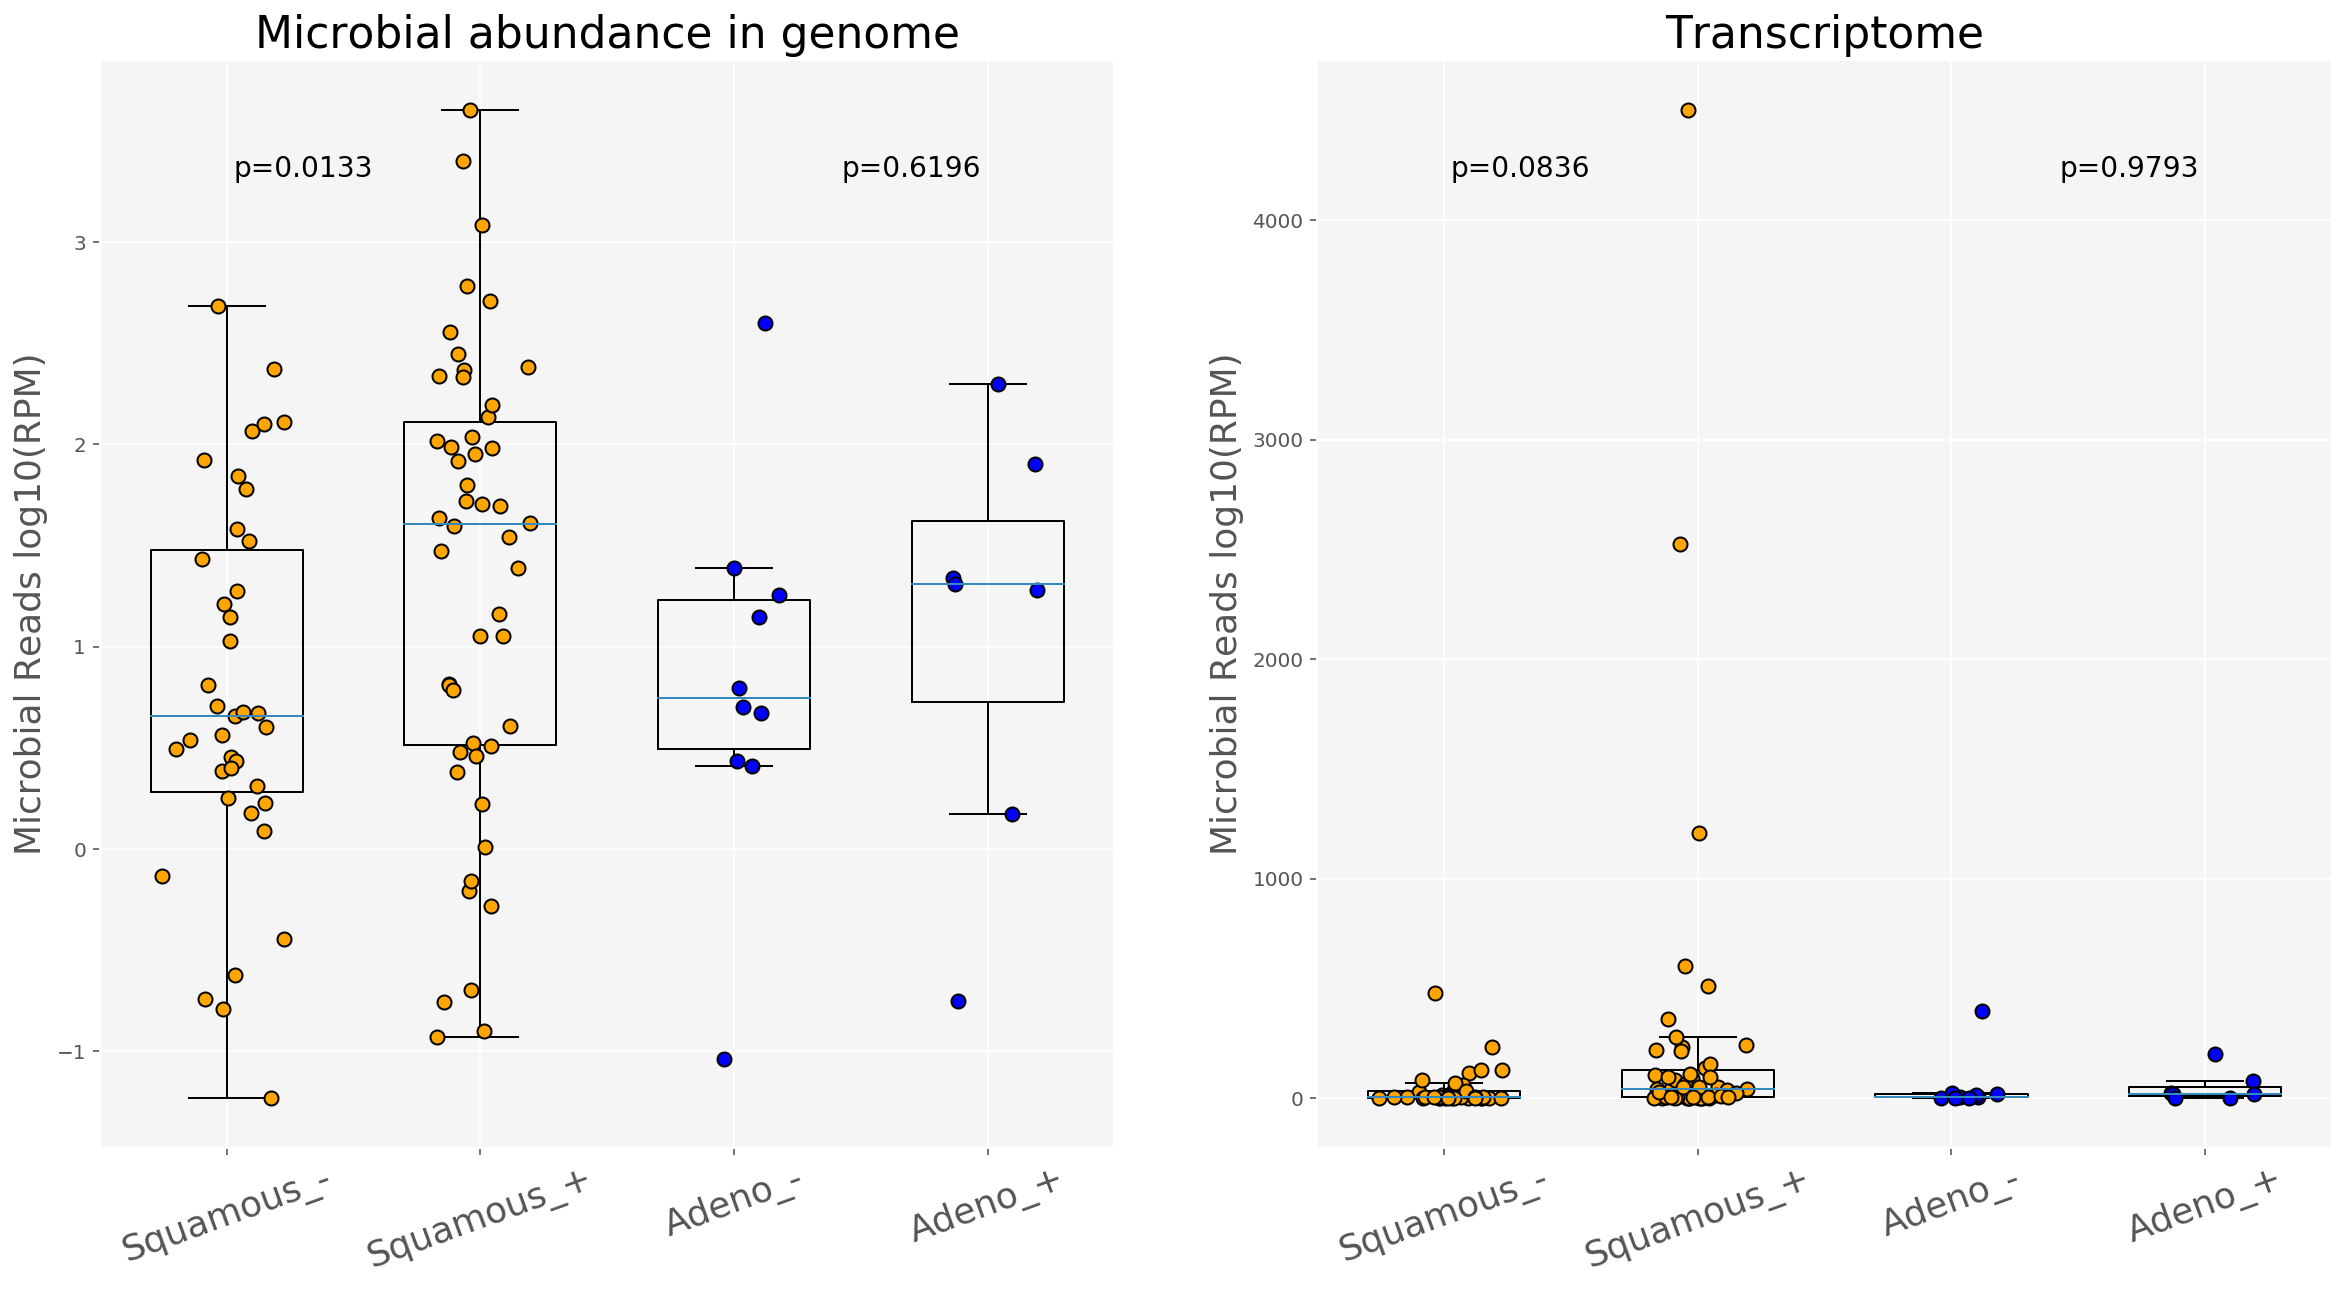

In [274]:
# separate into squamous and adeno, test HIV status difference.
value_cols = ['genome_logRPM', 'total']
titles = ['Microbial abundance in genome', 'Transcriptome']
# boxplot overlaps individual data point
fig, axes = plt.subplots(int(len(value_cols)/2.0), 2, figsize=(20, 10))
axes = axes.ravel()
group_col = 'combo'
# group_col = 'HIV_status'
categories = sorted(df[group_col].unique().tolist(), reverse=True) 
p_values = {}
for k, col in enumerate(value_cols):
    ax = axes[k]
    value_col = col
    for position, cat in enumerate(categories):
        _ = ax.boxplot(df.query('{0} == "{1}"'.format(group_col, cat))[col], 
                   positions=[position], widths=(0.6), showfliers=False
                  );

    np.random.seed(0)
    
    grps = {}
    # overlay actuall data point
    for i, cat in enumerate(categories):
        # add jitter and specify maker facecolor and edgecolor
        y = df[value_col][df[group_col]==cat]
        x = np.random.normal(i, 0.1, size=len(y))
#         ax.scatter(x, y, s=30)
        _ = ax.plot(x, y, mfc = ["orange","orange","blue","blue","yellow", "black"][i], mec='k', ms=7, marker="o", linestyle="None")
        grps[i] = df.query('{0} == "{1}"'.format(group_col, cat))[col]

    # statistical test for 1st grp
    statsT, p = ss.ttest_ind(grps[0], grps[1])
#     stats, p = ss.mannwhitneyu(grps[0], grps[1], use_continuity=True, alternative=None)
    p = round(p, 4)
    _ = ax.text(0.2, 0.9,'p={}'.format(p), ha='center', va='center', transform=ax.transAxes, size=14) 
    
    # statistical test fro 2nd grp
    statsT, p = ss.ttest_ind(grps[2], grps[3])
#     stats, p = ss.mannwhitneyu(grps[2], grps[3], use_continuity=True, alternative=None)
    p = round(p, 4)
    _ = ax.text(0.8, 0.9,'p={}'.format(p), ha='center', va='center', transform=ax.transAxes, size=14)    
    
    ax.set_facecolor('whitesmoke') #specify plot backgroup color
    ax.tick_params(axis='x', labelsize=18) #specify x tick label size
    _ = ax.set_xticks(range(position+1))
    _ = ax.set_xticklabels(categories, rotation=20)
#     ax.set_title(col)
    _ = ax.set_title('{}'.format(titles[k]), fontsize=22)
    _ = ax.set_xlim(xmin=-0.5)
    _= ax.set_ylabel('Microbial Reads log10(RPM)', fontsize=18)
    ax.grid(True)

plt.suptitle('', fontsize=14)       

plt.savefig('/projects/trans_scratch/validations/workspace/szong/Cervical/bbt/107_patients/microbial_load_separate_by_histology_and_HIV_plots.png', dpi=200)


In [254]:
df_genome = df.copy()

In [263]:
dfj.shape

(107, 46)

In [267]:
dfgt = pd.merge(df_genome, dfj['total'].to_frame(), left_index=True, right_index=True, how='left')

In [270]:
dfgt['transcriptome_logRPM'] = np.log10(dfgt.total_y)

In [272]:
dfgt = dfgt.fillna('NA')

In [273]:
of3 = '/projects/trans_scratch/validations/workspace/szong/Cervical/bbt/107_patients/bbt_total_microbial_RPM_DNA_RNA.csv'
dfgt.to_csv(of3, sep='\t')

In [36]:
# use fisher exact test to see if hpv_16 is enriched in squamous or adeno
# contingency table:
#                               adeno   squamous
# number_of_hpv16+_patients:    1         39 
# number_of_hpv16-_patients:    18        24
import scipy.stats as stats
oddsratio, pvalue = stats.fisher_exact([[1, 39], [18, 24]])
print(pvalue)


9.88713115817e-06


In [37]:
oddsratio, pvalue = stats.fisher_exact([[12, 12], [7, 51]])
print(pvalue)

0.000468619357628


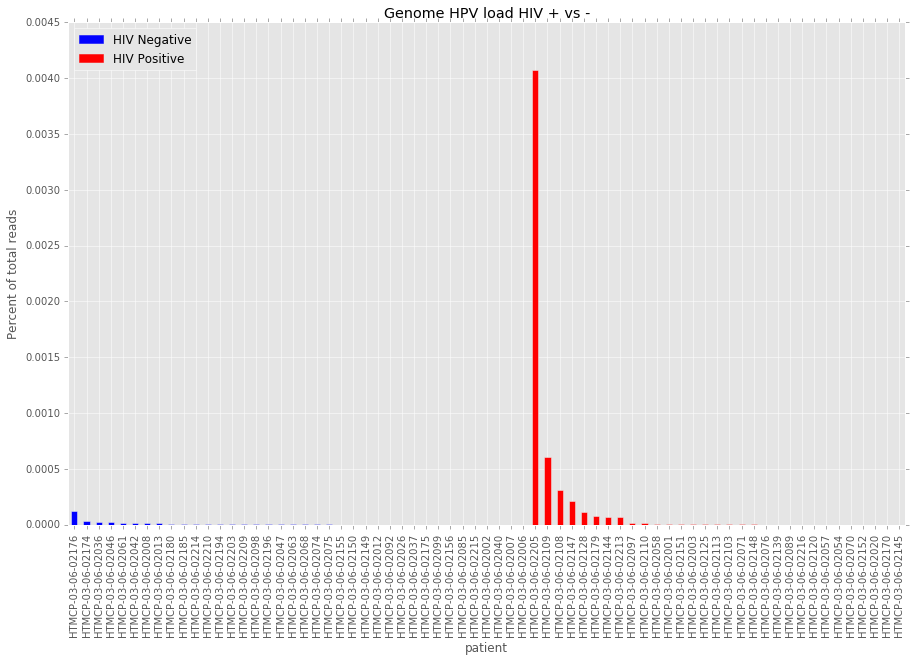

In [82]:
# hpv load
df = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/bbt/NCI_HIV_Cervial_genome_and_transcriptome_BBT_results_03092016.csv', 
                 sep='\t', index_col='patient')

# look at genome phv load
df = df[df.data_type=='genome']
# df = df[df.data_type=='transcriptome']
df.columns
df = df[['HIV_status', 'Human_papillomavirus']]
# grouped = df.groupby('HIV_status')
df = df.sort_values(['HIV_status', 'Human_papillomavirus'], ascending=[True, False])
# colors = df_genome_sorted['HIV_status']
colors = {'Negative':'blue', 'Positive':'red'}
fig = plt.figure()
# all following 3 works, just pass a list of colors
# df_genome_sorted['genome_load'].plot(kind='bar', color=[colors[i] for i in df_genome_sorted['HIV_status']])
# df_genome_sorted['genome_load'].plot(kind='bar', color=list(df_genome_sorted['HIV_status'].map(colors)))
df['Human_papillomavirus'].plot(kind='bar', 
                                color=df['HIV_status'].apply(lambda x: colors[x]), 
                                title='Genome HPV load HIV + vs -')
plt.ylabel('Percent of total reads')

# draw customized legend
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

Negative = mpatches.Patch(color='blue', label='HIV Negative')
Positive = mpatches.Patch(color='red', label='HIV Positive')

plt.legend(handles=[Negative, Positive], loc=2)
plt.savefig('HPV load HIV + vs -', bbox_inches='tight')


In [191]:
# df.sort_values(['Human_papillomavirus'])
# a lot has zero hpv hits, this is bbt results, integrations results have more positives

In [91]:
df.sort_values()

TypeError: sort_values() takes at least 2 arguments (1 given)

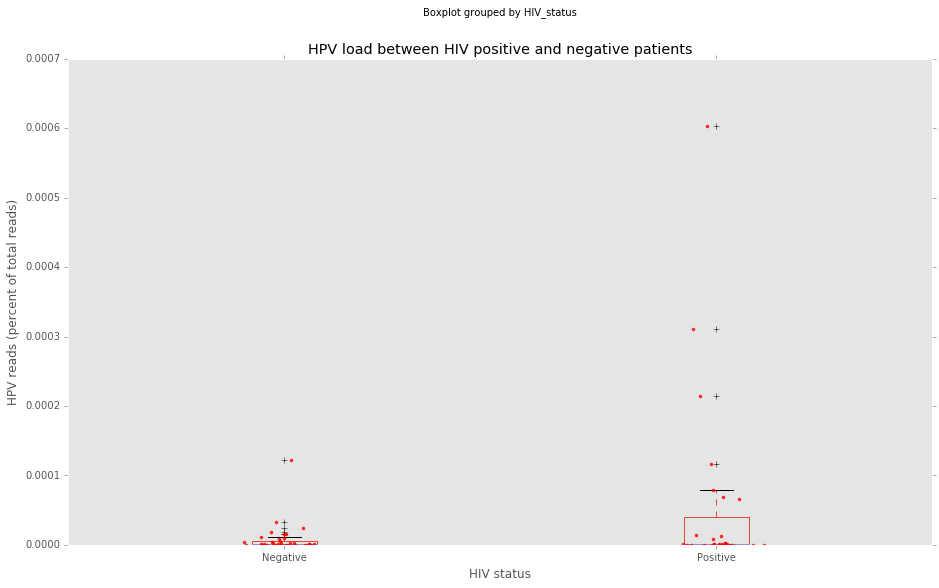

In [57]:
# boxplot for hpv load
# boxplot by groups
fig = plt.figure()
ax = df.boxplot(column='Human_papillomavirus', by='HIV_status', grid=False)
# overlay actuall data points
for i in ['Positive', 'Negative']:
    y = df['Human_papillomavirus'][df['HIV_status']==i]
    if i=='Positive':
        i=2
    elif i=='Negative':
        i=1
    # add jitter
    x = np.random.normal(i, 0.04, size=len(y))
    plt.plot(x, y, 'r.', alpha=0.8)

ax.set_ylim(0,0.0007)
# ax.set_axis_bgcolor('white')
plt.xlabel("HIV status")
plt.ylabel('HPV reads (percent of total reads)')
plt.title('HPV load between HIV positive and negative patients')
plt.savefig('hpv_load_and_HIV_status.png')

In [58]:
# tie corrected Mann Whitney U test,
negative_load = df[(df['HIV_status']=='Negative') & (df['Human_papillomavirus'] >0.000005)]
positive_load = df[(df['HIV_status']=='Positive') & (df['Human_papillomavirus'] >0.000005)] 
negative_load
ss.mannwhitneyu(negative_load['Human_papillomavirus'], positive_load['Human_papillomavirus'], use_continuity=True, alternative=None)

MannwhitneyuResult(statistic=24.0, pvalue=0.015866996878448274)

In [59]:
negative_load, positive_load

(                  HIV_status  Human_papillomavirus
 patient                                           
 HTMCP-03-06-02176   Negative              0.000123
 HTMCP-03-06-02174   Negative              0.000033
 HTMCP-03-06-02036   Negative              0.000024
 HTMCP-03-06-02046   Negative              0.000019
 HTMCP-03-06-02061   Negative              0.000016
 HTMCP-03-06-02042   Negative              0.000015
 HTMCP-03-06-02008   Negative              0.000011
 HTMCP-03-06-02013   Negative              0.000010
 HTMCP-03-06-02180   Negative              0.000008
 HTMCP-03-06-02185   Negative              0.000005,
                   HIV_status  Human_papillomavirus
 patient                                           
 HTMCP-03-06-02205   Positive              0.004070
 HTMCP-03-06-02109   Positive              0.000603
 HTMCP-03-06-02108   Positive              0.000311
 HTMCP-03-06-02147   Positive              0.000214
 HTMCP-03-06-02128   Positive              0.000117
 HTMCP-03-0

In [192]:
# look at total microbial load
df = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/bbt/NCI_HIV_Cervial_genome_and_transcriptome_BBT_results_03092016.csv', 
                 sep='\t', index_col='patient')

# look at genome microbial load
df = df[df.data_type=='genome']

# drop columns axis =1
# df = df.drop(['tissue_status', 'HIV_status', 'data_type', 'library_id', 'other_bacteria', 'other_viruses', 'vectors'], axis=1)
df = df.drop(['tissue_status', 'HIV_status', 'data_type', 'library_id', 'vectors', 'phiX'], axis=1)
# df = df.drop('HTMCP-03-06-02205')

# iloc support integer index
# loc support label index
# df.iloc[[2]]
# df.loc[['HTMCP-03-06-02205']]
# df.idxmax(axis=1)

# headers = [i for i in df.columns if df[i].max() >0.00001]
# headers = [i for i in df.columns if df[i].max() >0]

df['load'] = df.sum(axis=1)*100
df_genome = df.loc[:, ['load']]
df_genome = df_genome.rename(columns = {'load':'genome_load'})
# df_genome.sort_values('genome_load')
# df['load'].sort_values().plot(kind='bar')

IOError: File /projects/trans_scratch/validations/workspace/szong/Cervical/bbt/NCI_HIV_Cervial_genome_and_transcriptome_BBT_results_03092016.csv does not exist

In [65]:
df = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/bbt/NCI_HIV_Cervial_genome_and_transcriptome_BBT_results_03092016.csv', 
                 sep='\t', index_col='patient')
# look at genome microbial load
df = df[df.data_type=='transcriptome']

# drop columns axis =1
# df = df.drop(['tissue_status', 'HIV_status', 'data_type', 'library_id', 'other_bacteria', 'other_viruses', 'vectors'], axis=1)
df = df.drop(['tissue_status', 'HIV_status', 'data_type', 'library_id', 'vectors', 'phiX'], axis=1)
# df = df.drop('HTMCP-03-06-02205')

# iloc support integer index
# loc support label index
# df.iloc[[2]]
# df.loc[['HTMCP-03-06-02205']]
# df.idxmax(axis=1)

# headers = [i for i in df.columns if df[i].max() >0.00001]
# headers = [i for i in df.columns if df[i].max() >0]

df['load'] = df.sum(axis=1)*100
# keep a column as data frame instead of Series

df_transcriptome = df.loc[:, ['load']]
df_transcriptome = df_transcriptome.rename(columns = {'load':'trans_load'}) 
df_transcriptome.head()
# df['load'].sort_values().plot(kind='bar')

,trans_load
patient,
HTMCP-03-06-02036,0.266325
HTMCP-03-06-02037,0.008568
HTMCP-03-06-02047,0.726650
HTMCP-03-06-02210,0.097741
HTMCP-03-06-02092,0.025371


In [66]:
df_joined = df_genome.join(df_transcriptome, how='outer')

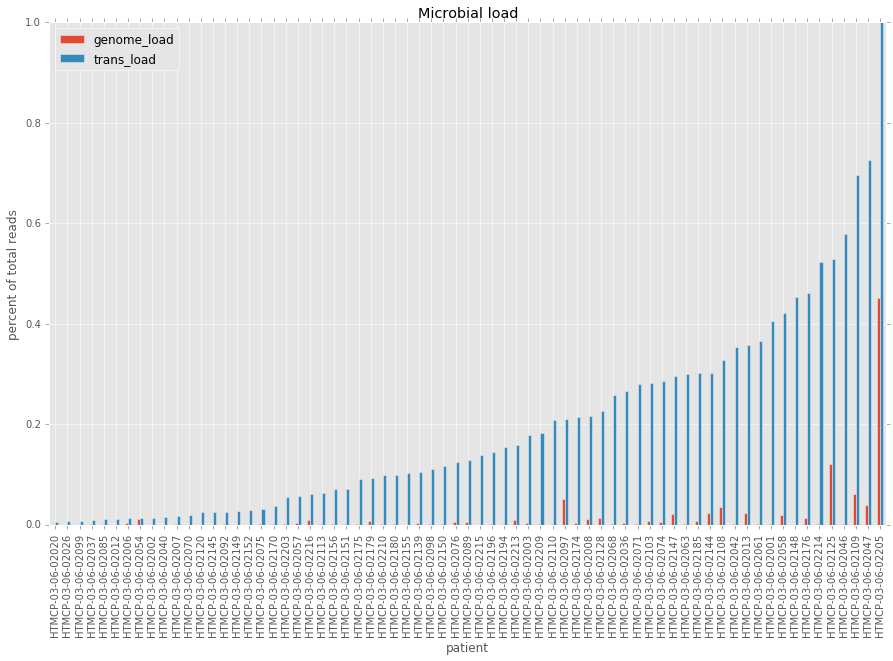

In [67]:
fig = plt.figure()
df_joined.sort_values(['trans_load']).plot(kind='bar', ylim=(0, 1), title='Microbial load')
plt.ylabel('percent of total reads')
# prevent figure cut off
plt.savefig("HIV_cervical_microbial_load.png",bbox_inches='tight')

In [213]:
# plot microbes
df = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/bbt/82_patients/NCI_HIV_Cervial_genome_and_transcriptome_BBT_results_82_patients_12232016.csv', 
                 sep='\t', index_col='patient')

# look at genome microbial load
df = df[df.data_type=='genome']

# drop columns axis =1
# df = df.drop(['tissue_status', 'HIV_status', 'data_type', 'library_id', 'other_bacteria', 'other_viruses', 'vectors'], axis=1)
df = df.drop(['tissue_status', 'HIV_status', 'data_type', 'vectors', 'phiX', 'other_bacteria', 'other_viruses'], axis=1)
df.head()
# np.log10([1,2,3])
df=df*1000000+1
df.head()

,Burkholderia_spp,Campylobacter_spp,Chlamydia_spp,Clostridium_spp,Escherichia_coli,Bacteriodes_spp,Fusobacterium_nucleatum,Helicobacter_pylori,Klebsiella_spp,Listeria_spp,...,Human_herpesvirus_7,Human_herpesvirus_8,Human_immunodeficiency_virus,Human_papillomavirus,Human_T_lymphotropic_virus,Polyomaviruses,Rotaviruses,Sphingomonas_spp,multiMatch,noMatch
patient,,,,,,,,,,,,,,,,,,,,,
HTMCP-03-06-02113,1.0000,1.0000,1,1.0426,1.0810,1.2686,1.0000,1,1.0000,1.0,...,1.0043,1.0,1.0,2.4752,1.0,1.0,1,1.0,1,1
HTMCP-03-06-02036,1.0000,1.0000,1,1.0000,1.0000,3.6138,1.0795,1,1.0000,1.0,...,1.0212,1.0,1.0,24.9328,1.0,1.0,1,1.0,1,1
HTMCP-03-06-02037,1.0000,1.0000,1,1.0000,1.0043,1.0605,1.0000,1,1.0000,1.0,...,1.0086,1.0,1.0,1.0000,1.0,1.0,1,1.0,1,1
HTMCP-03-06-02047,1.0000,1.1882,1,1.4498,7.7739,87.7024,111.8520,1,1.0000,1.0,...,1.0321,1.0,1.0,2.2758,1.0,1.0,1,1.0,1,1
HTMCP-03-06-02242,1.0035,19.2727,1,3.7236,1161.9200,1078.6500,1.1981,1,1.1981,1.0,...,1.0212,1.0,1.0,1.0000,1.0,1.0,1,1.0,1,1


In [214]:
# to RPM
df = np.log10(df)

In [215]:
df.head()

,Burkholderia_spp,Campylobacter_spp,Chlamydia_spp,Clostridium_spp,Escherichia_coli,Bacteriodes_spp,Fusobacterium_nucleatum,Helicobacter_pylori,Klebsiella_spp,Listeria_spp,...,Human_herpesvirus_7,Human_herpesvirus_8,Human_immunodeficiency_virus,Human_papillomavirus,Human_T_lymphotropic_virus,Polyomaviruses,Rotaviruses,Sphingomonas_spp,multiMatch,noMatch
patient,,,,,,,,,,,,,,,,,,,,,
HTMCP-03-06-02113,0.000000,0.000000,0.0,0.018118,0.033826,0.103325,0.000000,0.0,0.000000,0.0,...,0.001863,0.0,0.0,0.393610,0.0,0.0,0.0,0.0,0.0,0.0
HTMCP-03-06-02036,0.000000,0.000000,0.0,0.000000,0.000000,0.557964,0.033223,0.0,0.000000,0.0,...,0.009111,0.0,0.0,1.396771,0.0,0.0,0.0,0.0,0.0,0.0
HTMCP-03-06-02037,0.000000,0.000000,0.0,0.000000,0.001863,0.025511,0.000000,0.0,0.000000,0.0,...,0.003719,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
HTMCP-03-06-02047,0.000000,0.074890,0.0,0.161308,0.890639,1.943011,2.048644,0.0,0.000000,0.0,...,0.013722,0.0,0.0,0.357134,0.0,0.0,0.0,0.0,0.0,0.0
HTMCP-03-06-02242,0.001517,1.284943,0.0,0.570963,3.065176,3.032881,0.078493,0.0,0.078493,0.0,...,0.009111,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [225]:
np.log10([1,2,5,10, 50])

array([ 0.     ,  0.30103,  0.69897,  1.     ,  1.69897])

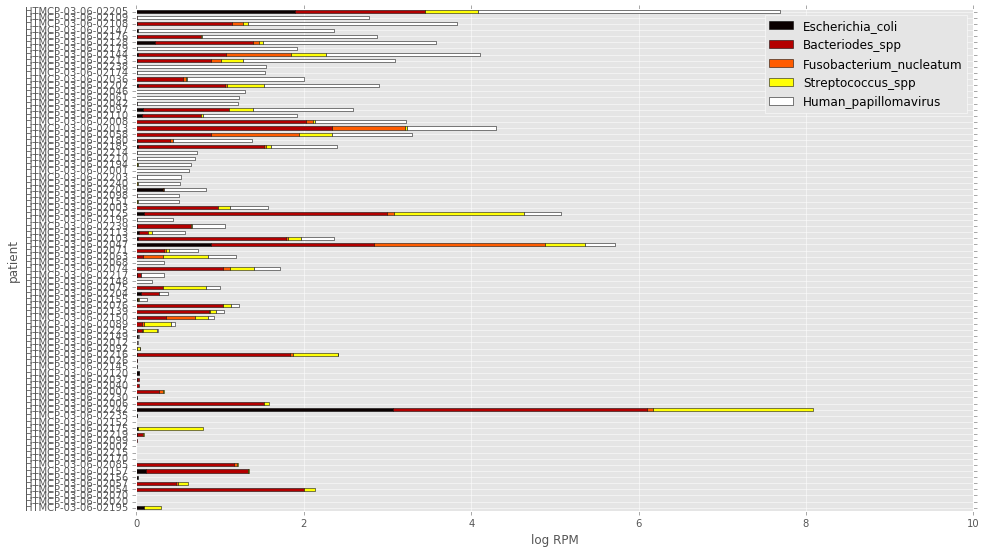

In [227]:
headers = [i for i in df.columns if df[i].max() >1.6]
# headers = [i for i in df.columns if df[i].max() >0]
num_colors = len(headers)
fig = plt.figure()
colors = plt.cm.hot(np.linspace(0, 1, num_colors))

df[headers].sort_values(['Human_papillomavirus']).plot(kind='barh', legend=True, stacked=True, xlim=(0, 10), color=colors, edgecolor='black')
# df[headers].sort_values(['Bacteriodes_spp']).plot(kind='barh', legend=True, stacked=True, xlim=(0, 10), color=colors, edgecolor='black')
plt.xlabel('log RPM')
plt.savefig('top_5_microbes.png', bbox_inches='tight')

In [228]:
!pwd

/projects/trans_scratch/validations/workspace/szong/Cervical/bbt


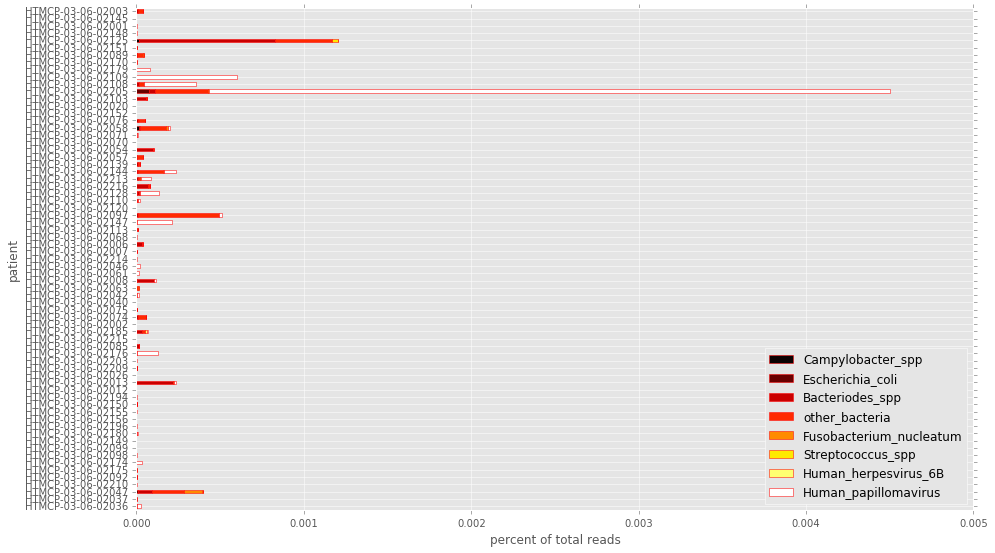

In [237]:
# drop columns axis =1
# df = df.drop(['tissue_status', 'HIV_status', 'data_type', 'library_id', 'other_bacteria', 'other_viruses', 'vectors'], axis=1)
df = df.drop(['tissue_status', 'HIV_status', 'data_type', 'library_id', 'vectors', 'phiX'], axis=1)

headers = [i for i in df.columns if df[i].max() >0.00001]
# headers = [i for i in df.columns if df[i].max() >0]
num_colors = len(headers)
fig = plt.figure()
colors = plt.cm.hot(np.linspace(0, 1, num_colors))

df[headers].plot(kind='barh', legend=True, stacked=True, xlim=(0), color=colors, edgecolor='red')
plt.xlabel('percent of total reads')
plt.savefig('Microbial load distribution', bbox_inches='tight')

In [355]:
df.head()

,HIV_status,Burkholderia_spp,Campylobacter_spp,Chlamydia_spp,Clostridium_spp,Escherichia_coli,Bacteriodes_spp,other_bacteria,Fusobacterium_nucleatum,Helicobacter_pylori,...,Human_herpesvirus_7,Human_herpesvirus_8,Human_immunodeficiency_virus,Human_papillomavirus,Human_T_lymphotropic_virus,other_viruses,Polyomaviruses,Rotaviruses,Sphingomonas_spp,load
patient,,,,,,,,,,,,,,,,,,,,,
HTMCP-03-06-02036,Negative,4.983000e-07,0.000000,0,1.993000e-07,0.000002,0.000005,0.000074,4.584300e-06,0,...,0.0,0,0.0,2.542760e-03,0.0,6.976000e-07,9.966000e-07,0,3.986000e-07,0.254276
HTMCP-03-06-02037,Negative,2.752000e-07,0.000000,0,0.000000e+00,0.000002,0.000000,0.000056,2.752000e-07,0,...,0.0,0,0.0,9.170000e-08,0.0,2.752000e-07,9.173000e-07,0,9.170000e-08,0.000009
HTMCP-03-06-02047,Negative,1.620200e-06,0.000002,0,1.582120e-05,0.000006,0.000325,0.000886,5.071170e-03,0,...,0.0,0,0.0,8.742640e-04,0.0,1.524900e-06,2.096800e-06,0,6.672000e-07,0.087426
HTMCP-03-06-02210,Negative,1.126200e-06,0.000000,0,0.000000e+00,0.000004,0.000000,0.000068,1.251000e-07,0,...,0.0,0,0.0,5.930030e-04,0.0,1.251000e-07,1.251000e-07,0,5.005000e-07,0.059300
HTMCP-03-06-02092,Negative,5.868000e-07,0.000000,0,1.956000e-07,0.000002,0.000000,0.000229,0.000000e+00,0,...,0.0,0,0.0,0.000000e+00,0.0,5.868000e-07,1.369300e-06,0,9.780000e-08,0.000000


In [149]:
# edited 01032017
!pwd

/projects/trans_scratch/validations/workspace/szong/Cervical/bbt


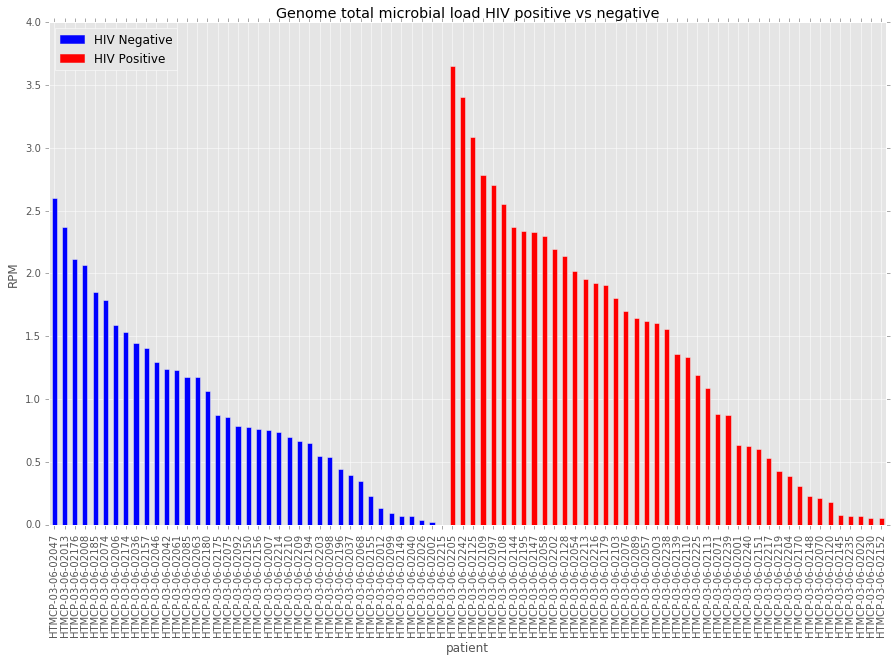

In [184]:
# HIV status associated with microbial load?
# this file only have data for 69 patients
# df = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/bbt/NCI_HIV_Cervial_genome_and_transcriptome_BBT_results_03092016.csv', 
#                  sep='\t', index_col='patient')
df = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/bbt/82_patients/NCI_HIV_Cervial_genome_and_transcriptome_BBT_results_82_patients_12232016.csv',
                sep='\t', index_col='patient')

# df.head()
# df.columns

# look at genome microbial load
df = df[df.data_type=='genome']
# df = df[df.data_type=='transcriptome']
# drop columns axis =1
# df = df.drop(['tissue_status', 'HIV_status', 'data_type', 'library_id', 'other_bacteria', 'other_viruses', 'vectors'], axis=1)
# df = df.drop(['tissue_status', 'data_type', 'library_id', 'vectors', 'phiX', 'multiMatch', 'noMatch'], axis=1)
df = df.drop(['tissue_status', 'data_type', 'vectors', 'phiX', 'multiMatch', 'noMatch', 'human', 'Propionibacterium_spp'], axis=1)
# df.head()
# for i in df.columns:
#     print i

# df = df.drop('HTMCP-03-06-02205')

# iloc support integer index
# loc support label index
# df.iloc[[2]]
# df.loc[['HTMCP-03-06-02205']]
# df.idxmax(axis=1)

# headers = [i for i in df.columns if df[i].max() >0.00001]
# headers = [i for i in df.columns if df[i].max() >0]
# just look at hpv
# df['load_tmp'] = df['Human_papillomavirus']*1000000
# turned out not significant because two many low counts

# convert to RPM
df['load_tmp'] = df.sum(axis=1)*1000000
df['load'] = np.log10(df['load_tmp']+1)
# df.head()

# df['load'] = df['Human_papillomavirus']*100
df_genome = df.loc[:, ['HIV_status', 'load']]
df_genome = df_genome.rename(columns = {'load':'genome_load'})
df_genome.head()
df_genome.to_csv('microbial_load_genome.txt', sep='\t')
# df_genome.to_csv('microbial_load_transcriptome.txt', sep='\t')



# df_genome.ix['HTMCP-03-06-02007']

# df.sort_values(['a', 'b'], ascending=[True, False])
df_genome_sorted = df_genome.sort_values(['HIV_status', 'genome_load'], ascending=[True, False])

df_genome_sorted.tail()


# colors = df_genome_sorted['HIV_status']
colors = {'Negative':'blue', 'Positive':'red'}
fig = plt.figure()
# all following 3 works, just pass a list of colors
# df_genome_sorted['genome_load'].plot(kind='bar', color=[colors[i] for i in df_genome_sorted['HIV_status']])
# df_genome_sorted['genome_load'].plot(kind='bar', color=list(df_genome_sorted['HIV_status'].map(colors)))
df_genome_sorted['genome_load'].plot(kind='bar', 
                                     color=df_genome_sorted['HIV_status'].apply(lambda x: colors[x]), 
                                     title='Genome total microbial load HIV positive vs negative')
plt.ylabel('RPM')

# draw customized legend
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

Negative = mpatches.Patch(color='blue', label='HIV Negative')
Positive = mpatches.Patch(color='red', label='HIV Positive')

plt.legend(handles=[Negative, Positive], loc=2)
plt.savefig('Microbial load HIV positive vs HIV negative', bbox_inches='tight')
# plt.legend()
# df_genome_sorted



In [185]:
# Mannwhiteney test
negative_load = df_genome_sorted[df_genome_sorted['HIV_status']=='Negative']
positive_load = df_genome_sorted[(df_genome_sorted['HIV_status']=='Positive')]# & (df_genome_sorted['genome_load'] <20)] 
negative_load
# ttest_ind(negative_load['genome_load'], positive_load['genome_load'])
# Negative = df[(df['HIV_status']=='Negative')]
# Positive = df[df['HIV_status']=='Positive']

# tie corrected Mann Whitney U test,
ss.mannwhitneyu(negative_load['genome_load'], positive_load['genome_load'], use_continuity=True, alternative=None)

MannwhitneyuResult(statistic=611.0, pvalue=0.017528031087830569)

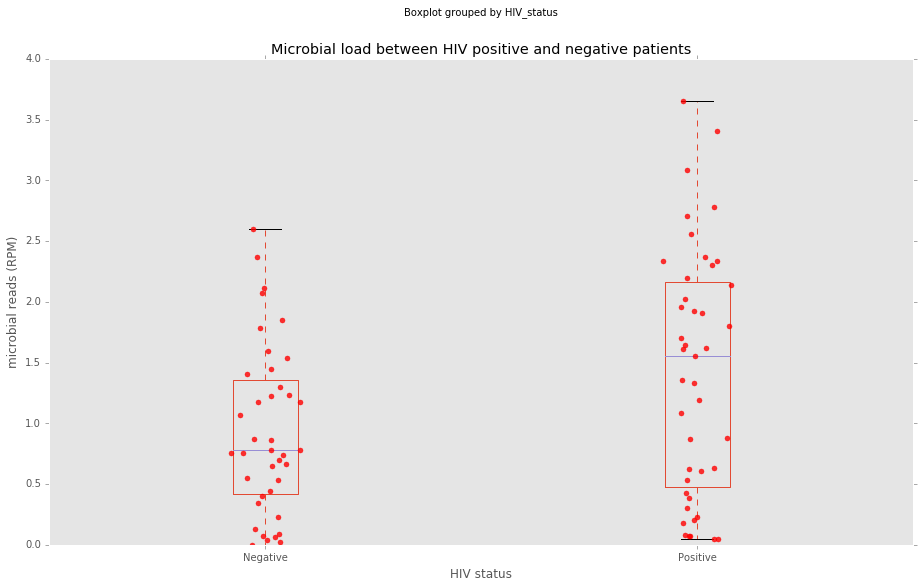

In [188]:
df = df_genome
df.head()

# bp = titanic.boxplot(column='age', by='pclass', grid=False)
# for i in [1,2,3]:
#     y = titanic.age[titanic.pclass==i].dropna()
#     # Add some random "jitter" to the x-axis
#     x = np.random.normal(i, 0.04, size=len(y))
#     plt.plot(x, y, 'r.', alpha=0.2)


# boxplot by groups
fig = plt.figure()
ax = df.boxplot(column='genome_load', by='HIV_status', grid=False)
# overlay actuall data points
for i in ['Positive', 'Negative']:
    y = df['genome_load'][df['HIV_status']==i]
    if i=='Positive':
        i=2
    elif i=='Negative':
        i=1
    # add jitter
    x = np.random.normal(i, 0.04, size=len(y))
    plt.plot(x, y, 'r.', markersize=10, alpha=0.8)

# ax.set_ylim(0,0.1)
# ax.set_axis_bgcolor('white')
plt.xlabel("HIV status")
plt.ylabel('microbial reads (RPM)')
plt.title('Microbial load between HIV positive and negative patients')
plt.savefig('microbial_load_and_HIV_status.png')

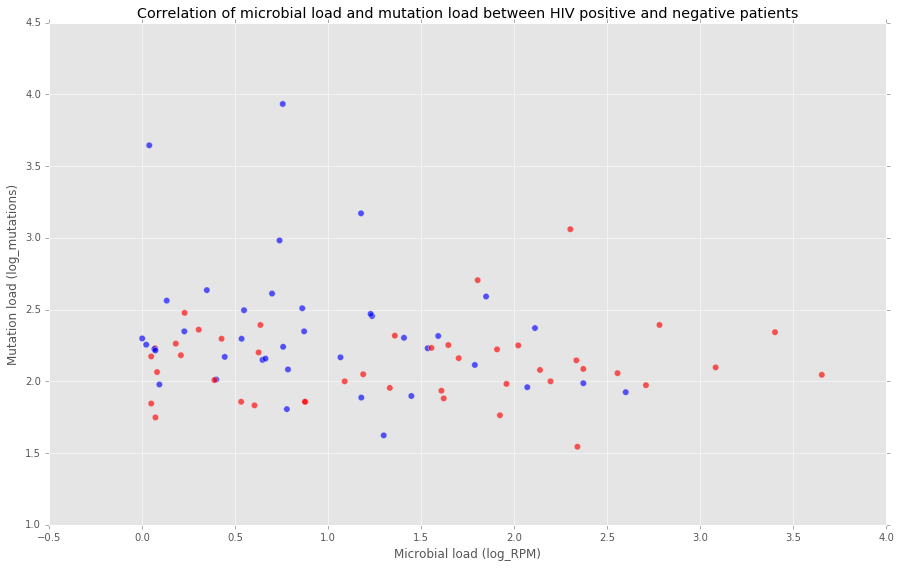

In [170]:
# try scatter plot between microbial load and number of mutations
# get mutations
df_all_patients = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/82_patients/num_mutations.csv',
                             sep='\t', index_col='patient')
merged = pd.merge(df, df_all_patients,left_index=True, right_index=True, how='outer')
merged.head()

merged['log_mutations'] =np.log10(merged['mutations'])
# micro_merged['log_mutations'] =np.log10(micro_merged['mutations']+1)

colors = ['red' if i=="Positive" else 'blue' for i in merged['hiv']]
fig = plt.figure()
ax = plt.subplot(111)
# plt.scatter(micro_merged['genome_load'], micro_merged['total_mutation'], c=colors, alpha=1)
plt.scatter(merged['genome_load'], merged['log_mutations'], s=40, c=colors, alpha=0.65)
# ax.set_ylim(0,500)
# micro_merged.plot('genome_load', 'total_mutation', kind='scatter')
plt.xlabel("Microbial load (log_RPM)")
plt.ylabel('Mutation load (log_mutations)')
# plt.legend()
plt.title('Correlation of microbial load and mutation load between HIV positive and negative patients')
plt.savefig('correlation_microbial_mutation_load_and_HIV_status.png')

In [176]:
merged.head()

,HIV_status,genome_load,hiv,mutations,log_mutations
patient,,,,,
HTMCP-03-06-02001,Positive,0.635323,Positive,247,2.392697
HTMCP-03-06-02002,Negative,0.021520,Negative,180,2.255273
HTMCP-03-06-02003,Positive,1.608629,Positive,86,1.934498
HTMCP-03-06-02006,Negative,1.591421,Negative,207,2.315970
HTMCP-03-06-02007,Negative,0.755600,Negative,8568,3.932879


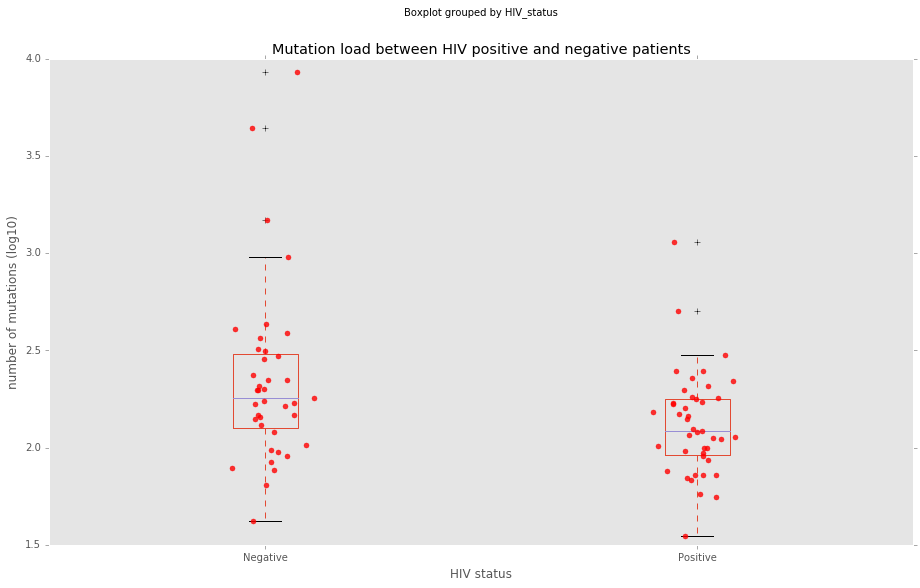

In [171]:
# statistical test 
Negative = merged[(merged['HIV_status']=='Negative')]
Positive = merged[merged['HIV_status']=='Positive']
# tie corrected Mann Whitney U test,
ss.mannwhitneyu(Negative['log_mutations'], Positive['log_mutations'], use_continuity=True, alternative=None)
# ss.mannwhitneyu(Negative['log_RPM'], Positive['log_RPM'], use_continuity=True, alternative=None)

MannwhitneyuResult(statistic=553.0, pvalue=0.004067993677531672)

In [190]:
# df['genome_load'][df['HIV_status']]
# df['HIV_status']=='Negative'
# df['genome_load'][df['HIV_status']=='Negative']

In [189]:
# df['genome_load']


In [50]:
negative_load.head()

,HIV_status,genome_load
patient,,
HTMCP-03-06-02047,Negative,0.726650
HTMCP-03-06-02046,Negative,0.578442
HTMCP-03-06-02214,Negative,0.523275
HTMCP-03-06-02176,Negative,0.461949
HTMCP-03-06-02061,Negative,0.365387


In [127]:
# t test to see if difference in microbial load is significant
negative_load = df_genome_sorted[df_genome_sorted['HIV_status']=='Negative']
positive_load = df_genome_sorted[(df_genome_sorted['HIV_status']=='Positive')]# & (df_genome_sorted['genome_load'] <20)] 
negative_load
# ttest_ind(negative_load['genome_load'], positive_load['genome_load'])
# Negative = df[(df['HIV_status']=='Negative')]
# Positive = df[df['HIV_status']=='Positive']

# tie corrected Mann Whitney U test,
ss.mannwhitneyu(negative_load['genome_load'], positive_load['genome_load'], use_continuity=True, alternative=None)

MannwhitneyuResult(statistic=613.0, pvalue=0.018347557126335175)

In [ ]:
# Below are only analysis for 69 patients

In [80]:
# HIV status associated with microbial load? old 69 patients
df = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/bbt/NCI_HIV_Cervial_genome_and_transcriptome_BBT_results_03092016.csv', 
                 sep='\t', index_col='patient')

# look at genome microbial load
df = df[df.data_type=='genome']

# drop columns axis =1
# df = df.drop(['tissue_status', 'HIV_status', 'data_type', 'library_id', 'other_bacteria', 'other_viruses', 'vectors'], axis=1)
df = df.drop(['tissue_status', 'data_type', 'library_id', 'vectors', 'phiX'], axis=1)
# df = df.drop('HTMCP-03-06-02205')

# iloc support integer index
# loc support label index
# df.iloc[[2]]
# df.loc[['HTMCP-03-06-02205']]
# df.idxmax(axis=1)

# headers = [i for i in df.columns if df[i].max() >0.00001]
# headers = [i for i in df.columns if df[i].max() >0]

df['load'] = df.sum(axis=1)*100
df_genome = df.loc[:, ['HIV_status', 'load']]
df_genome = df_genome.rename(columns = {'load':'genome_load'})
df_genome.head()
df_genome_sorted = df_genome.sort_values(['HIV_status'])

In [81]:
df_genome.ix['HTMCP-03-06-02036']

HIV_status       Negative
genome_load    0.00269866
Name: HTMCP-03-06-02036, dtype: object

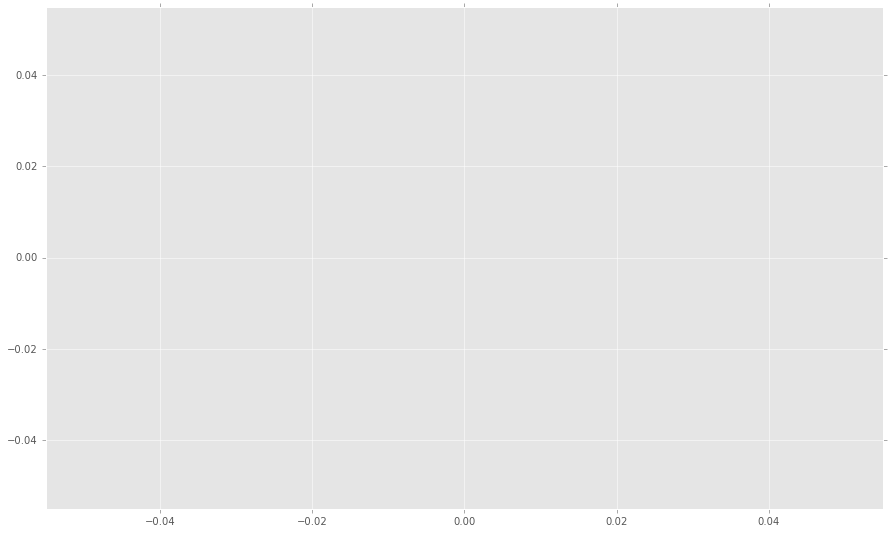

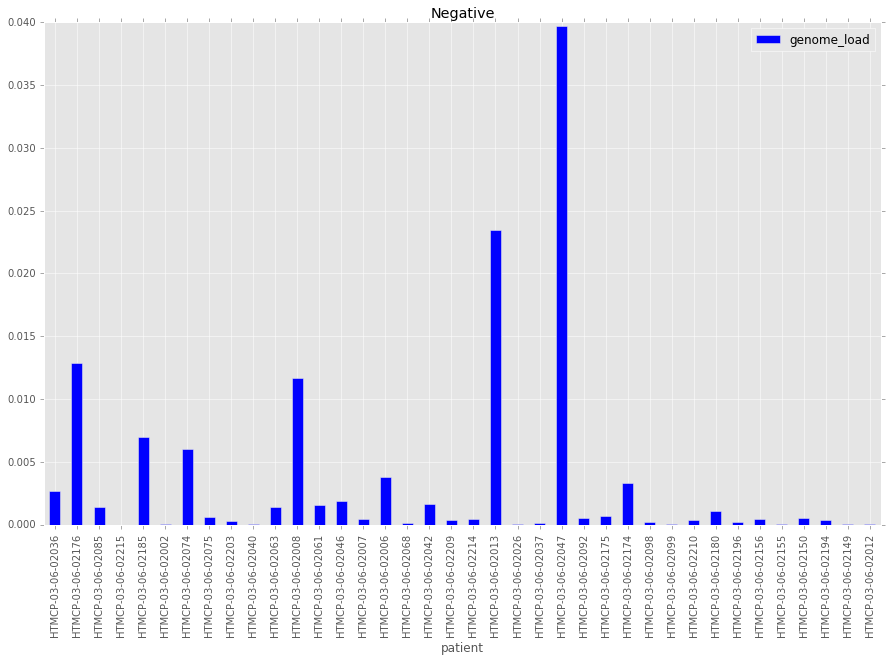

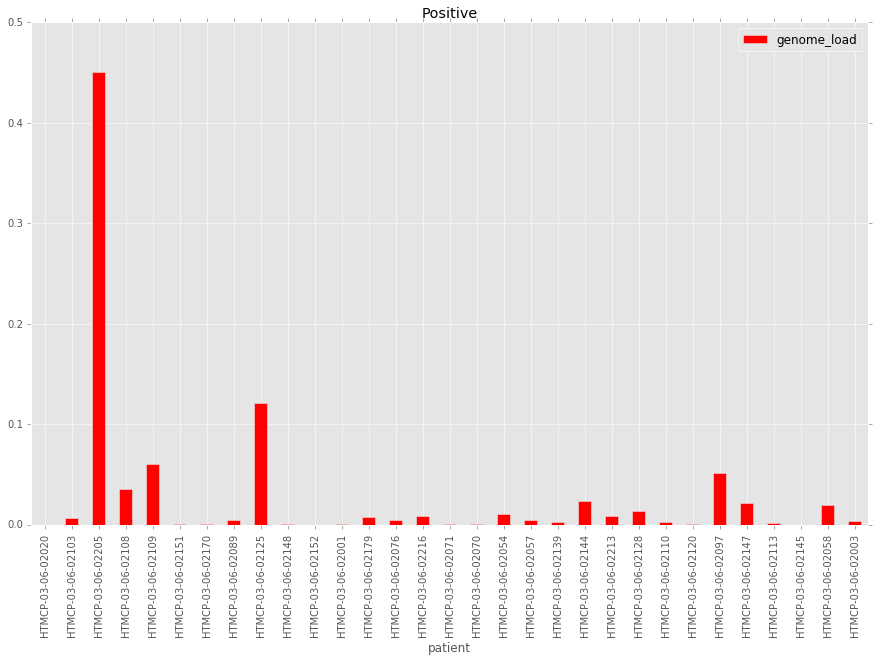

In [76]:
groups = df_genome_sorted.groupby('HIV_status')
# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
colors = {'Negative':'blue', 'Positive':'red'}

for name, group in groups:
    group.plot(kind='bar', title=name, color=colors[name])

plt.show()

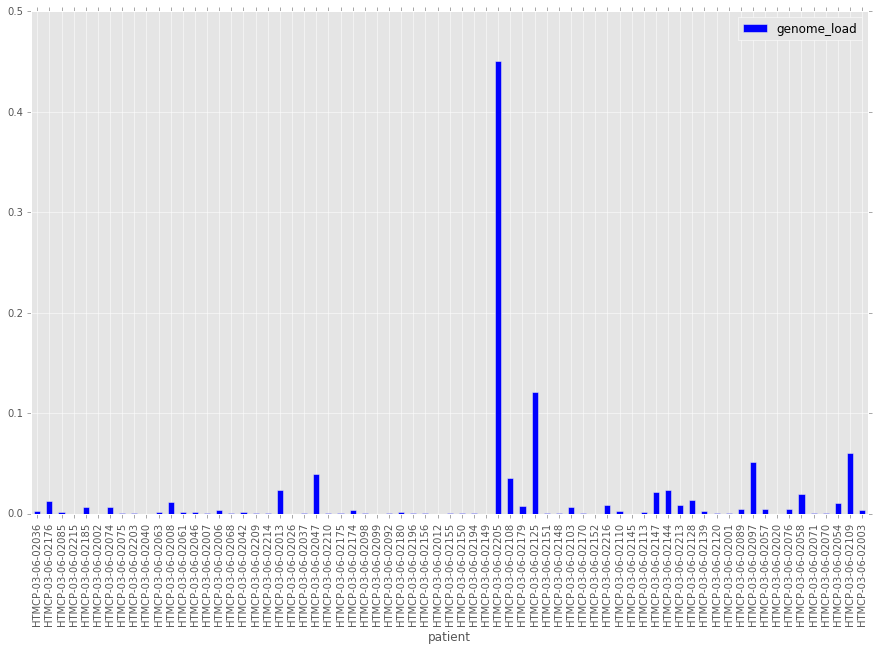

In [280]:
# HIV status associated with microbial load?
df = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/bbt/NCI_HIV_Cervial_genome_and_transcriptome_BBT_results_03092016.csv', 
                 sep='\t', index_col='patient')

# look at genome microbial load
df = df[df.data_type=='genome']

# drop columns axis =1
# df = df.drop(['tissue_status', 'HIV_status', 'data_type', 'library_id', 'other_bacteria', 'other_viruses', 'vectors'], axis=1)
df = df.drop(['tissue_status', 'data_type', 'library_id', 'vectors', 'phiX'], axis=1)
# df = df.drop('HTMCP-03-06-02205')

# iloc support integer index
# loc support label index
# df.iloc[[2]]
# df.loc[['HTMCP-03-06-02205']]
# df.idxmax(axis=1)

# headers = [i for i in df.columns if df[i].max() >0.00001]
# headers = [i for i in df.columns if df[i].max() >0]

df['load'] = df.sum(axis=1)*100
df_genome = df.loc[:, ['HIV_status', 'load']]
df_genome = df_genome.rename(columns = {'load':'genome_load'})
df_genome.head()

df_genome_sorted = df_genome.sort_values(['HIV_status'])
# colors = df_genome_sorted['HIV_status']
colors = {'Negative':'blue', 'negative':'blue', 'positive':'red', 'Positive':'red'}

# ax.scatter(df['carat'], df['price'], c=df['color'].apply(lambda x: colors[x]))
df_genome_sorted.plot(kind='bar', color=df_genome_sorted['HIV_status'].apply(lambda x: colors[x]))
# df_genome_sorted

In [26]:
df[i for i in df.columns if df[df.columns[i]] >0.000001]



SyntaxError: invalid syntax (<ipython-input-26-0ab66543ce24>, line 1)

In [ ]:
# drop columns < 0.000001
df.drop()

/home/szong/projects/development/coverage/venv/lib/python2.7/site-packages/ipykernel/__main__.py:19: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


ValueError: too many values to unpack

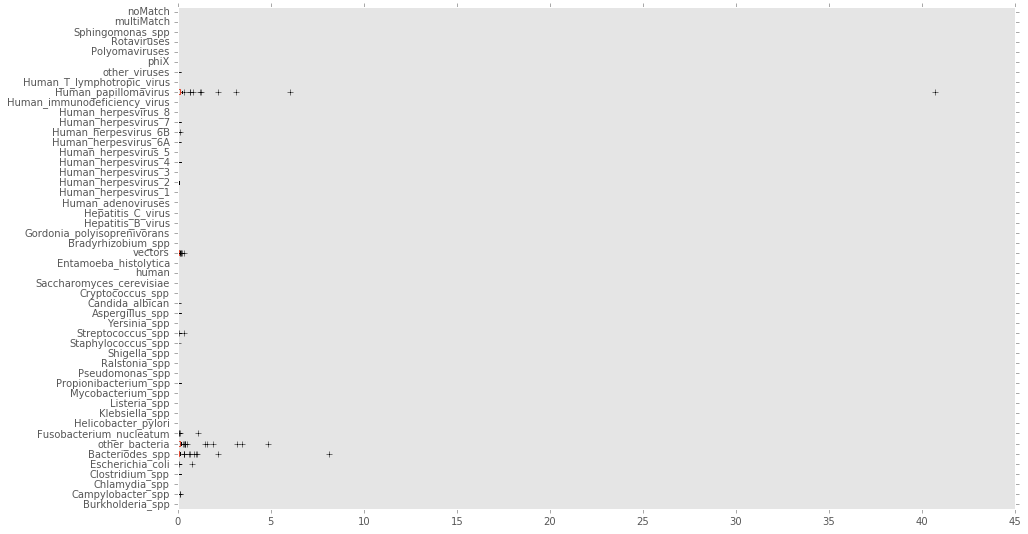

In [29]:
# HIV status associated with microbial load?
df = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/bbt/NCI_HIV_Cervial_genome_and_transcriptome_BBT_results_03092016.csv', 
                 sep='\t', index_col='patient')

df.head()

# look at genome microbial load
df = df[df.data_type=='genome']
# df = df[df.data_type=='transcriptome']
# drop columns axis =1
# df = df.drop(['tissue_status', 'HIV_status', 'data_type', 'library_id', 'other_bacteria', 'other_viruses', 'vectors'], axis=1)
# df = df.drop(['tissue_status', 'data_type', 'HIV_status','library_id', 'vectors', 'phiX', 'multiMatch', 'noMatch'], axis=1)
df.head()
df = df*10000


# df.plot(df.index, df.columns, kind='scatter')
# df.drop(['Human_papillomavirus'], axis=1, inplace=True)
fig, ax = df.boxplot(vert=False, grid=False)
ax.set_xlim(0,5)

In [391]:
df.index

Index([u'Burkholderia_spp', u'Campylobacter_spp', u'Chlamydia_spp',
       u'Clostridium_spp', u'Escherichia_coli', u'Bacteriodes_spp',
       u'other_bacteria', u'Fusobacterium_nucleatum', u'Helicobacter_pylori',
       u'Klebsiella_spp', u'Listeria_spp', u'Mycobacterium_spp',
       u'Propionibacterium_spp', u'Pseudomonas_spp', u'Ralstonia_spp',
       u'Shigella_spp', u'Staphylococcus_spp', u'Streptococcus_spp',
       u'Yersinia_spp', u'Aspergillus_spp', u'Candida_albican',
       u'Cryptococcus_spp', u'Saccharomyces_cerevisiae', u'human',
       u'Entamoeba_histolytica', u'Bradyrhizobium_spp',
       u'Gordonia_polyisoprenivorans', u'Hepatitis_B_virus',
       u'Hepatitis_C_virus', u'Human_adenoviruses', u'Human_herpesvirus_1',
       u'Human_herpesvirus_2', u'Human_herpesvirus_3', u'Human_herpesvirus_4',
       u'Human_herpesvirus_5', u'Human_herpesvirus_6A',
       u'Human_herpesvirus_6B', u'Human_herpesvirus_7', u'Human_herpesvirus_8',
       u'Human_immunodeficiency_virus', u'

In [16]:


# df['load'] = df.sum(axis=1)*100
# # df['load'] = df['Human_papillomavirus']*100
# df_genome = df.loc[:, ['HIV_status', 'load']]
# df_genome = df_genome.rename(columns = {'load':'genome_load'})
# df_genome.head()
# # df.sort_values(['a', 'b'], ascending=[True, False])
# df_genome_sorted = df_genome.sort_values(['HIV_status', 'genome_load'], ascending=[True, False])
# # colors = df_genome_sorted['HIV_status']
# colors = {'Negative':'blue', 'Positive':'red'}
fig = plt.figure()
# all following 3 works, just pass a list of colors
# df_genome_sorted['genome_load'].plot(kind='bar', color=[colors[i] for i in df_genome_sorted['HIV_status']])
# df_genome_sorted['genome_load'].plot(kind='bar', color=list(df_genome_sorted['HIV_status'].map(colors)))
df_genome_sorted['genome_load'].plot(kind='bar', 
                                     color=df['HIV_status'].apply(lambda x: colors[x]), 
                                     title='Genome total microbial load HIV + vs -')
plt.ylabel('Percent of total reads')

# draw customized legend
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

Negative = mpatches.Patch(color='blue', label='HIV Negative')
Positive = mpatches.Patch(color='red', label='HIV Positive')

plt.legend(handles=[Negative, Positive], loc=2)
plt.savefig('Microbial load HIV + vs -', bbox_inches='tight')
# plt.legend()
# df_genome_sorted

,Burkholderia_spp,Campylobacter_spp,Chlamydia_spp,Clostridium_spp,Escherichia_coli,Bacteriodes_spp,other_bacteria,Fusobacterium_nucleatum,Helicobacter_pylori,Klebsiella_spp,...,Human_immunodeficiency_virus,Human_papillomavirus,Human_T_lymphotropic_virus,other_viruses,phiX,Polyomaviruses,Rotaviruses,Sphingomonas_spp,multiMatch,noMatch
count,6.900000e+01,6.900000e+01,69.0,6.900000e+01,6.900000e+01,6.900000e+01,6.900000e+01,6.900000e+01,69.0,6.900000e+01,...,69.0,69.000000,69.0,6.900000e+01,6.900000e+01,6.900000e+01,69.0,69.0,69.0,69.0
mean,5.000000e-10,4.173696e-07,0.0,1.056362e-07,1.255351e-06,2.417633e-05,2.898303e-05,1.983493e-06,0.0,5.894203e-09,...,0.0,0.000085,0.0,1.607246e-08,4.392754e-09,1.144928e-10,0.0,0.0,0.0,0.0
std,1.983461e-09,2.246599e-06,0.0,3.551186e-07,9.267619e-06,1.019219e-04,8.476404e-05,1.338969e-05,0.0,3.345666e-08,...,0.0,0.000494,0.0,3.360868e-08,1.569560e-08,9.510482e-10,0.0,0.0,0.0,0.0
min,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,...,0.0,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
25%,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,8.460000e-08,0.000000e+00,0.0,0.000000e+00,...,0.0,0.000000,0.0,4.300000e-09,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
50%,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,5.940000e-08,6.673000e-07,0.000000e+00,0.0,0.000000e+00,...,0.0,0.000001,0.0,8.600000e-09,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
75%,0.000000e+00,1.870000e-08,0.0,3.900000e-08,2.500000e-08,8.494600e-06,9.201000e-06,6.800000e-08,0.0,0.000000e+00,...,0.0,0.000010,0.0,1.900000e-08,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
max,1.180000e-08,1.381300e-05,0.0,2.610600e-06,7.682160e-05,8.123690e-04,4.841720e-04,1.108520e-04,0.0,2.674000e-07,...,0.0,0.004070,0.0,2.749000e-07,1.141000e-07,7.900000e-09,0.0,0.0,0.0,0.0


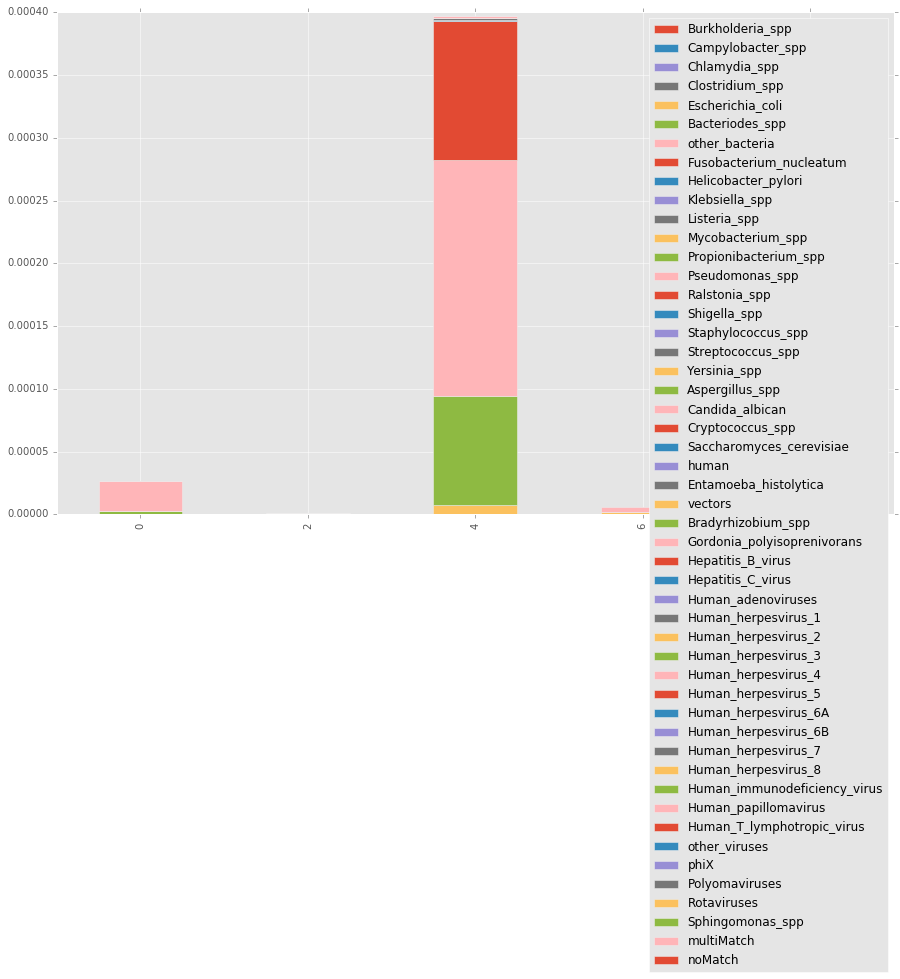

In [15]:
df.head().plot(kind='bar', legend=False, stacked=True)
plt.legend()

In [ ]:

#     print(test)

In [99]:
# get microbial load raw counts for sara's script'
df = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/bbt/bbt_raw_counts_files.txt', 
                 sep='\t', header=None)
df.head()
bbt_files = df[0].tolist()
df_bbt = pd.DataFrame()
for f in bbt_files:
    patient = f.split('/')[5]
    df_tmp = pd.read_csv(f, sep='\t')
    df_tmp.set_index('filter_id', inplace=True)
    df_tmp = df_tmp[['hits']]

    df_tmp.head()

    df_tmp.rename(columns={'hits':patient}, inplace=True)
    df_tmp.head()

    if df_bbt.empty:
        df_bbt = df_tmp
    else:
        df_bbt = df_bbt.join(df_tmp)
df_bbt = df_bbt.T
df_bbt.to_csv('bbt_raw_counts.tmp', sep='\t')